# Research Question - 1
How can smart meter data be effectively analysed to uncover patterns and trends in energy consumption across University Flats and Residential college facilities within the University of Otago?


TITLE - Optimizing Energy Usage and Predictive Insights: Harnessing Smart Meter Data and Weather Correlations

Smart meters are advanced electronic devices used to measure and record energy consumption.

To supplement the analysis of energy consumption, weather data from reputable sources like the New Zealand Weather Body (NIWA) is integrated into the research design
This weather data includes various meteorological variables that can potentially influence energy usage
The weather data includes the following relevant attributes:
Timestamp: Date and time of the weather observation.
Temperature: Ambient temperature in degrees Celsius or Fahrenheit.
Humidity: The relative humidity level expressed as a percentage.
Other Weather Parameters: Wind speed, precipitation, and other climatic conditions that may impact energy consumption.
-----------------------------------------------------------------------------------
-The energy Dataset consists of unique Smart meters
- Only 192  Smart Meters have been selected ( Approved by Property Manager )  
- 109 ( University Flats) and 83 ( Residential College )
- 35 Smart meters did not have Energy data  for more than 12 months
- 98 % of Dataset had energy consumption reading  was upto 25th March 2023.
- Hence , the Time period will be  from 1st Jan 2022 to 25th March 2023
- Mean Data Imputation was implemented
- Unwanted attributes removed  - REGISTER CONTENT
- Flat Type (University Flats or Residential College) , Full Address , Building Name , Building Code were added to the energy dataset  .
--------------------------------------------------------------------------------------------------
Smart meters comes into  2 types of category
1)	University Flats  - these are buildings where students stay  alone or with their family members  
2)	Residential College  - These are buildings which represents different college under the university with accommodation . hence called as residential college where they teach , students stay , office , store rooms etc
3)
The Otago University Smart Meter HHD 15 months.csv file contains the following columns:
 From  Jan 2022  to March 2023
1.	Smart Meter Id: Unique identifier for each smart meter. (Alphanumeric)
2.	Flats Category: Category of flats where the smart meter is installed. This can be either 'University Flats' or 'Residential College'. (Alphanumeric)
3.	Address: Complete address where the smart meter is installed. (Alphanumeric)
4.	Street: Street name, used for clustering purposes. (Alphanumeric)
5.	Building Name: Name of the building, used for clustering purposes. (Alphanumeric)
6.	Building Code: Code assigned to the building. (Alphanumeric)
7.	Date: Date when the readings were taken. (Date format) start from 1st Jan 2022 and ends up by 25th March 2023 ( 15 months )
8.	PERIODS: This column classifies each date as either a holiday or term time. Holidays are pre-defined dates like national holidays or weekends, whereas term time refers to regular working or school days. This classification is crucial for analyzing variations in energy consumption patterns during different periods.
9.	Seasons: This column indicates the season during which the energy reading was taken. Seasons can affect energy consumption patterns due to varying heating or cooling needs, daylight hours, and other seasonal activities.
10.	TotalDailyEnergyConsumption: Total energy consumed in a full day. (Numeric)
11.	00.00-01.00: Energy consumption from 12.00 am to 1.00 am. (Numeric)
12.	01.00-02.00: Energy consumption from 1.00 am to 2.00 am. (Numeric)
13.	02.00-03.00: Energy consumption from 2.00 am to 3.00 am. (Numeric)
14.	03.00-04.00: Energy consumption from 3.00 am to 4.00 am. (Numeric)  etc
    -------------------------------------------------------------------------
    
    Explanation of common weather report columns:
DATE: The date when the weather data was recorded, typically in a day/month/year format.
TIME: The time of the weather observation, usually in hours:minutes:seconds format.
TEMP: The air temperature, usually measured in degrees Celsius (°C).
RH: Relative Humidity, given as a percentage (%), indicating the amount of moisture in the air.
WINDSPD: Wind speed, reported in meters per second (m/s).
WINDIR: Wind direction, reported in degrees, with 0° or 360° indicating north, 90° east, 180° south, and 270° west.
GLOBAL: Global solar radiation, measured in watts per square meter (W/m²), which is the total amount of solar radiation received from the sun, including direct and diffuse radiation.
UVA: Ultraviolet A radiation, measured in watts per square meter (W/m²). UVA is less intense but more prevalent than UVB and is associated with skin aging.
UVB: Ultraviolet B radiation, also measured in watts per square meter (W/m²). UVB has a shorter wavelength and is associated with sunburn and skin cancer.
VISIBLE: The intensity of visible light, measured in micromoles per square meter per second (micromol/m²/s).
RAIN: Rainfall amount, typically measured in millimeters (mm).
PRESS: Atmospheric pressure, usually in hectopascals (hPa), indicating the weight of the air above.
MAXGUST: The maximum gust of wind speed recorded, in meters per second (m/s).
----------------------------------------------------------------------------------------------

- Data Collection:
- Smart Meter Data: The project will use the provided smart-metering data to analyze energy
- consumption across various University buildings and facilities.
- Weather Data: The integration of weather data from reputable sources, such as the New Zealand Weather Body (NIWA), will help explore correlations between energy consumption and meteorological variables like temperature and humidity.

    - RESEREACH QUESTIONS  
A) How can smart meter data be effectively analyzed to uncover patterns and trends in energy consumption across different buildings and facilities within the University of Otago?

B) What are the correlations between energy consumption and weather variables, such as temperature and humidity, and how can they be leveraged to optimize energy management practices?

C) What are the areas of high energy usage, anomalies, and potential inefficiencies within the University's energy systems, and how can energy consumption be accurately predicted by considering weather conditions and specific temporal factors such as day of the week and month?



In [ ]:
# Import Libaries and load dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Load the energy dataset
file_path = '/content/PROCESSED-Energy-Dataset-212-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = '/content/Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

In [ ]:
energy_data.columns

Index(['Smart Meter Id', 'Flats Category', 'Address', 'Street',
       'Building Name', 'Building Code', 'Periods', 'Seasons', 'Date',
       'TotaldailyenergyConsumption', '00.00-01.00 ', '01.00-02.00 ',
       '02.00-03.00 ', '03.00-04.00 ', '04.00-05.00 ', '05.00-06.00 ',
       '06.00-07.00 ', '07.00-08.00 ', '08.00-09.00 ', '09.00-10.00 ',
       '10.00-11.00 ', '11.00-12.00 ', '12.00-13.00 ', '13.00-14.00 ',
       '14.00-15.00 ', '15.00-16.00 ', '16.00-17.00 ', '17.00-18.00 ',
       '18.00-19.00 ', '19.00-20.00 ', '20.00-21.00 ', '21.00-22.00 ',
       '22.00-23.00 ', '23.00-24.00 '],
      dtype='object')

In [ ]:
weather_data.columns

Index(['DATE(dd/mm/yy)', 'TIME(HH:MM:SS)', 'TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)',
       'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)',
       'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)',
       'GUSTIME(hhmm)'],
      dtype='object')

# Histogram and density for Flats Category

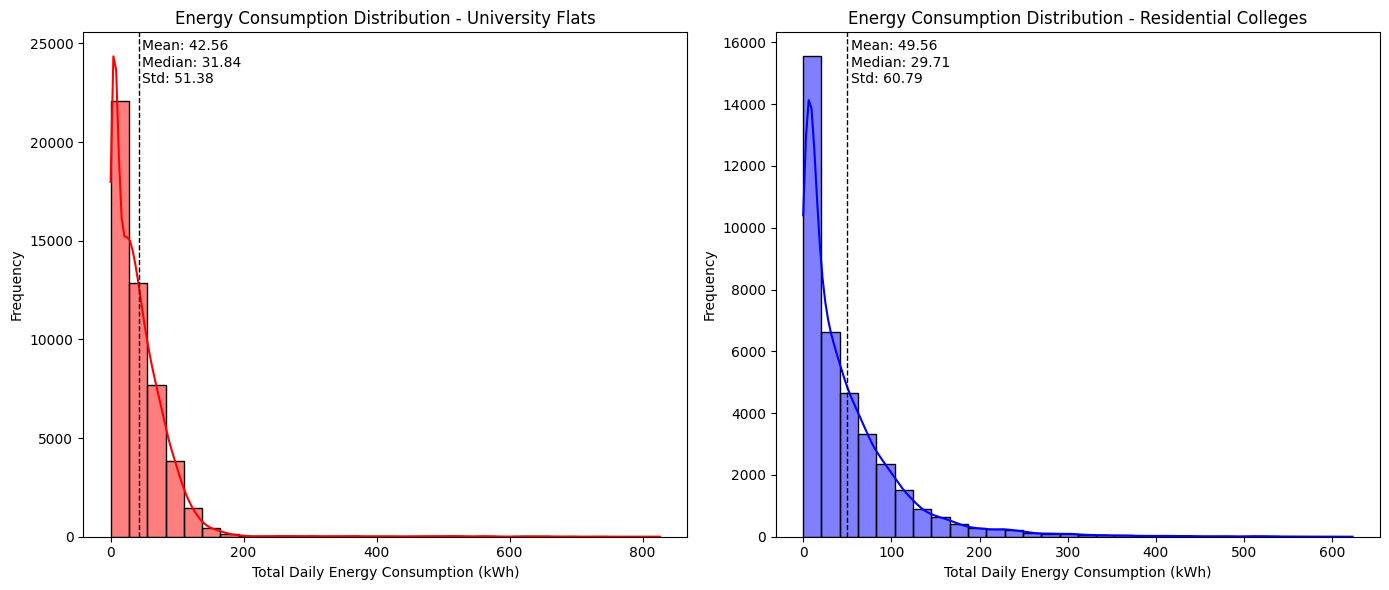

In [ ]:
# Histogram and density

# Filter data for University Flats and Residential Colleges
university_flats = energy_data[energy_data['Flats Category'] == 'University Flats']
residential_colleges = energy_data[energy_data['Flats Category'] == 'Residential College']

# Define the column for total daily energy consumption
total_energy_col = 'TotaldailyenergyConsumption'

# Calculate Descriptive Statistics
stats_flats = university_flats[total_energy_col].agg(['mean', 'median', 'std'])
stats_colleges = residential_colleges[total_energy_col].agg(['mean', 'median', 'std'])

# Create the plots
plt.figure(figsize=(14, 6))

# Histogram and density for University Flats
plt.subplot(1, 2, 1)
sns.histplot(university_flats[total_energy_col], kde=True, color='red', bins=30)
plt.title('Energy Consumption Distribution - University Flats')
plt.xlabel('Total Daily Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.axvline(stats_flats['mean'], color='k', linestyle='dashed', linewidth=1)
plt.text(stats_flats['mean']*1.1, plt.ylim()[1]*0.9, f'Mean: {stats_flats["mean"]:.2f}\nMedian: {stats_flats["median"]:.2f}\nStd: {stats_flats["std"]:.2f}', color='k')

# Histogram and density for Residential Colleges
plt.subplot(1, 2, 2)
sns.histplot(residential_colleges[total_energy_col], kde=True, color='blue', bins=30)
plt.title('Energy Consumption Distribution - Residential Colleges')
plt.xlabel('Total Daily Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.axvline(stats_colleges['mean'], color='k', linestyle='dashed', linewidth=1)
plt.text(stats_colleges['mean']*1.1, plt.ylim()[1]*0.9, f'Mean: {stats_colleges["mean"]:.2f}\nMedian: {stats_colleges["median"]:.2f}\nStd: {stats_colleges["std"]:.2f}', color='k')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# Descriptive Statistical Analysis of Energy Consumption in University of Otago Flats and Residential Colleges

In [ ]:

# Filter data for University Flats
university_flats_data = energy_data[energy_data['Flats Category'] == 'University Flats']
descriptive_stats_flats = university_flats_data.describe()

# Filter data for Residential Colleges
residential_colleges_data = energy_data[energy_data['Flats Category'] == 'Residential Colleges']
descriptive_stats_colleges = residential_colleges_data.describe()

# Print Descriptive Statistics
print("Descriptive Statistics for University Flats:")
print(descriptive_stats_flats)

print("\nDescriptive Statistics for Residential Colleges:")
print(descriptive_stats_colleges)


Descriptive Statistics for University Flats:
       TotaldailyenergyConsumption  00.00-01.00   01.00-02.00   02.00-03.00   \
count                 48941.000000  48941.000000  48941.000000  48941.000000   
mean                     42.556949      1.686129      1.481104      1.344241   
std                      51.382372      2.260508      2.041373      1.894637   
min                       0.000000      0.000000      0.000000      0.000000   
25%                       9.150000      0.210000      0.180000      0.160000   
50%                      31.840000      0.980000      0.860000      0.760000   
75%                      60.150000      2.400000      2.060000      1.860000   
max                     826.100000     35.000000     33.300000     29.400000   

       03.00-04.00   04.00-05.00   05.00-06.00   06.00-07.00   07.00-08.00   \
count  48941.000000  48941.000000  48941.000000  48941.000000  48941.000000   
mean       1.260324      1.208411      1.197086      1.256910      1.494903 

# Monthly Average Energy Consumption: University Flats vs Residential College

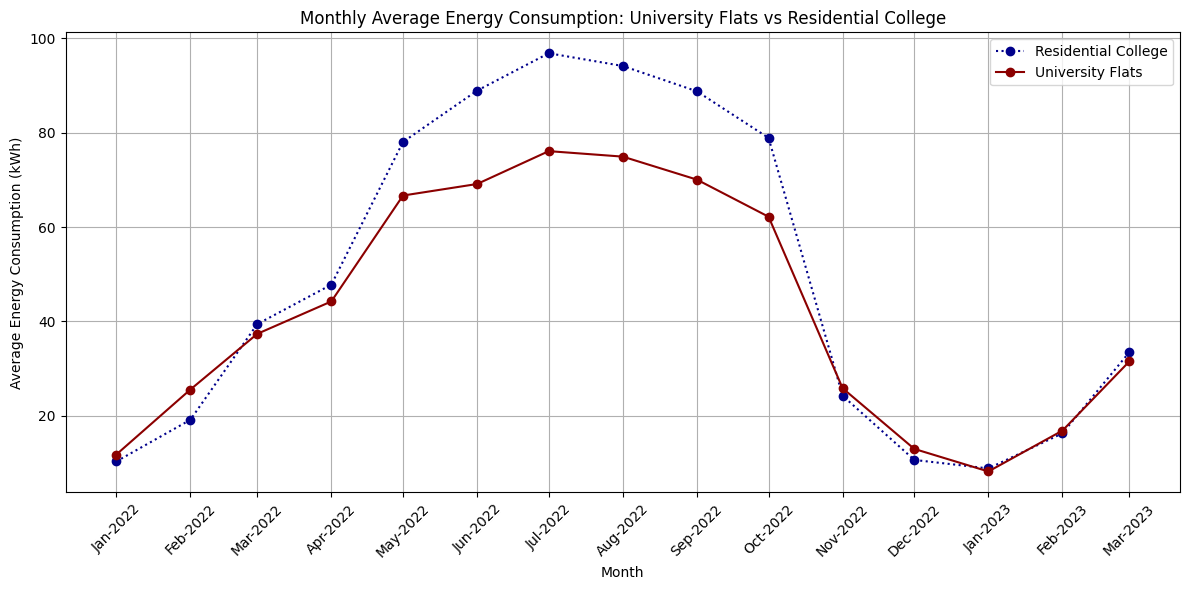

In [ ]:
#Monthly Average Energy Consumption: University Flats vs Residential College

# Convert the 'Date' column to datetime format and remove extra spaces from column names
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')


# Aggregate data by month and category
energy_data['Month'] = energy_data['Date'].dt.to_period('M')
monthly_data = energy_data.groupby(['Month', 'Flats Category'])['TotaldailyenergyConsumption'].mean().unstack()

# Define the time range for the x-axis
time_range = pd.date_range(start='2022-01', end='2023-04', freq='M').strftime('%b-%Y').tolist()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index.to_timestamp(), monthly_data['Residential College'],
         color='darkblue', linestyle='dotted', marker='o', label='Residential College')
plt.plot(monthly_data.index.to_timestamp(), monthly_data['University Flats'],
         color='darkred', marker='o', label='University Flats')

# Formatting the plot
plt.title('Monthly Average Energy Consumption: University Flats vs Residential College')
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption (kWh)')
plt.xticks(monthly_data.index.to_timestamp(), time_range, rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Ribbon Plot - Monthly Average Energy Consumption with SD

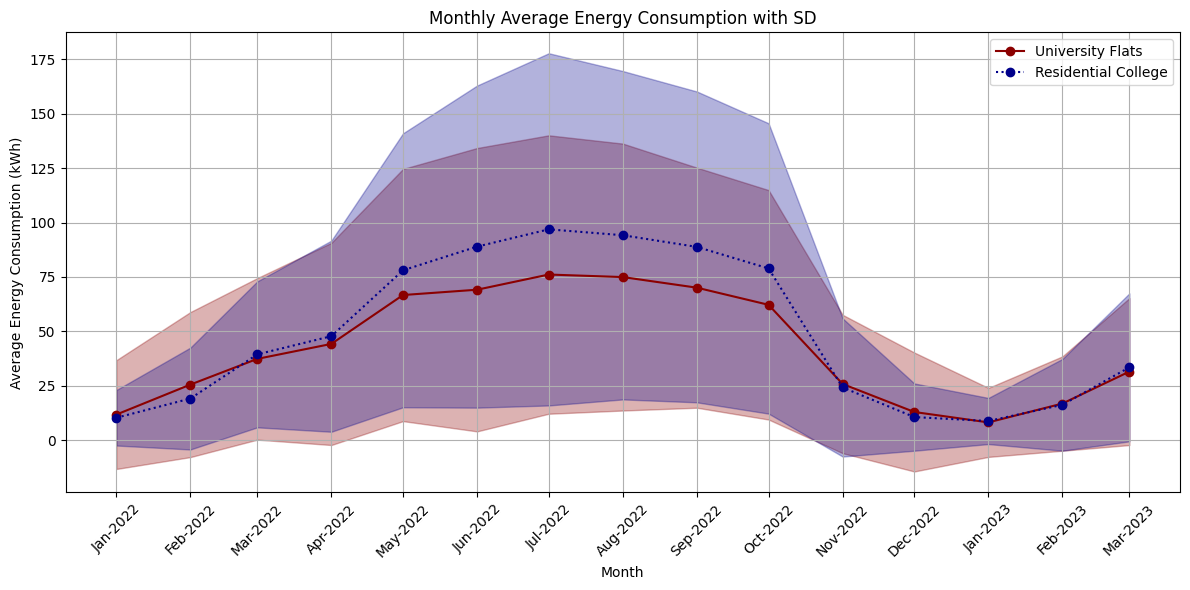

In [ ]:

# Convert the 'Date' column to datetime format
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')

# Aggregate data by month and category
energy_data['Month'] = energy_data['Date'].dt.to_period('M')
monthly_data = energy_data.groupby(['Month', 'Flats Category']).agg(
    Mean=('TotaldailyenergyConsumption', 'mean'),
    SD=('TotaldailyenergyConsumption', 'std')
).unstack()

# Define the time range for the x-axis
daily_labels = [
    'Jan-2022', 'Feb-2022', 'Mar-2022', 'Apr-2022', 'May-2022',
    'Jun-2022', 'Jul-2022', 'Aug-2022', 'Sep-2022', 'Oct-2022',
    'Nov-2022', 'Dec-2022', 'Jan-2023', 'Feb-2023', 'Mar-2023'
]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for University Flats
ax.plot(monthly_data.index.to_timestamp(), monthly_data['Mean', 'University Flats'],
        color='darkred', marker='o', label='University Flats')
ax.fill_between(monthly_data.index.to_timestamp(),
                monthly_data['Mean', 'University Flats'] - monthly_data['SD', 'University Flats'],
                monthly_data['Mean', 'University Flats'] + monthly_data['SD', 'University Flats'],
                color='darkred', alpha=0.3)

# Plot for Residential College
ax.plot(monthly_data.index.to_timestamp(), monthly_data['Mean', 'Residential College'],
        color='darkblue', linestyle='dotted', marker='o', label='Residential College')
ax.fill_between(monthly_data.index.to_timestamp(),
                monthly_data['Mean', 'Residential College'] - monthly_data['SD', 'Residential College'],
                monthly_data['Mean', 'Residential College'] + monthly_data['SD', 'Residential College'],
                color='darkblue', alpha=0.3)

# Setting titles and labels
ax.set_title('Monthly Average Energy Consumption with SD')
ax.set_ylabel('Average Energy Consumption (kWh)')
ax.set_xlabel('Month')
ax.set_xticks(monthly_data.index.to_timestamp())
ax.set_xticklabels(daily_labels, rotation=45)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


# Weekly Average Energy Consumption: University Flats vs Residential College

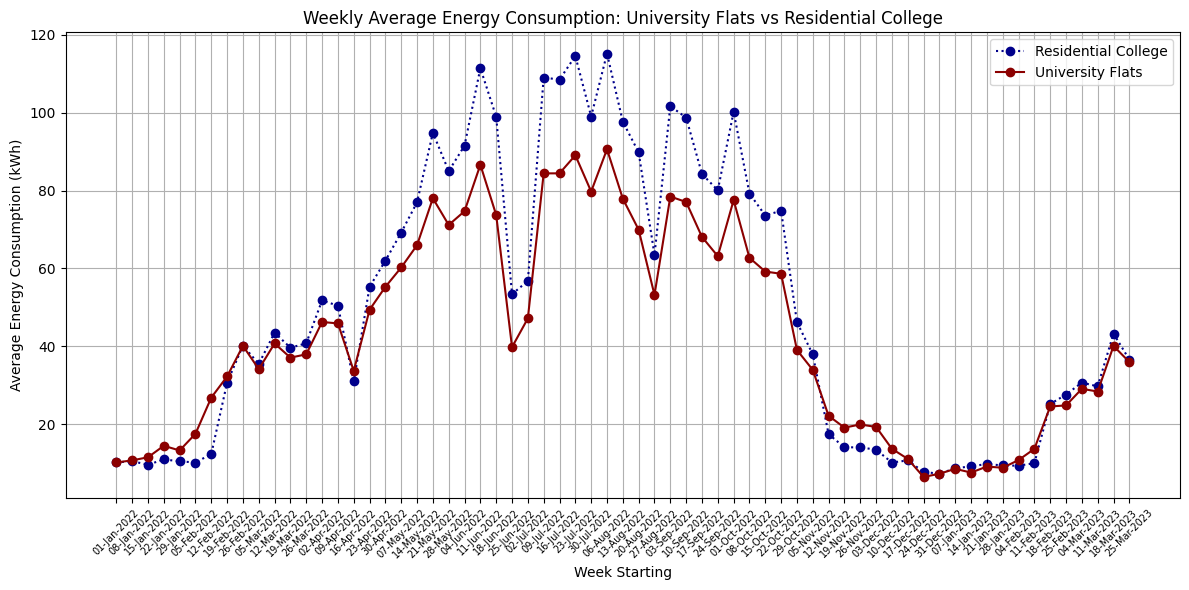

Flats Category  Residential College  University Flats
count                     65.000000         65.000000
mean                      49.385838         42.469661
std                       35.814444         26.315799
min                        7.213373          6.389332
25%                       12.287246         19.075767
50%                       40.746299         39.037536
75%                       80.078950         65.976553
max                      115.240809         90.621507


In [ ]:
# Weekly Average Energy Consumption: University Flats vs Residential College

# Convert the 'Date' column to datetime format and remove extra spaces from column names
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')
energy_data.columns = energy_data.columns.str.strip()

# Custom function to assign each date to a specific week
def assign_custom_week(date):
    start_date = pd.to_datetime('2022-01-01')
    end_date = pd.to_datetime('2023-03-25')
    if date < start_date:
        return None
    elif date > end_date:
        return None
    else:
        # Calculate the number of weeks since the start date
        week_number = np.floor((date - start_date).days / 7)
        return start_date + pd.to_timedelta(week_number * 7, unit='d')

# Apply the custom function to assign weeks
energy_data['Custom Week'] = energy_data['Date'].apply(assign_custom_week)

# Aggregate data by custom week and category
weekly_data = energy_data.groupby(['Custom Week', 'Flats Category'])['TotaldailyenergyConsumption'].mean().unstack()

# Calculate statistics for each week
weekly_stats = weekly_data.describe()

# Extracting the weeks from the dataset for the x-axis labels
actual_weeks = weekly_data.index.strftime('%d-%b-%Y').tolist()

# Re-plotting with the adjusted x-axis labels
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['Residential College'],
         color='darkblue', linestyle='dotted', marker='o', label='Residential College')
plt.plot(weekly_data.index, weekly_data['University Flats'],
         color='darkred', marker='o', label='University Flats')

# Formatting the plot
plt.title('Weekly Average Energy Consumption: University Flats vs Residential College')
plt.xlabel('Week Starting')
plt.ylabel('Average Energy Consumption (kWh)')

# Setting x-axis ticks with smaller font size
plt.xticks(weekly_data.index, actual_weeks, rotation=45, fontsize=7)

plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Display week-wise statistics
print(weekly_stats)


# Ribbon Plot - Weekly Average Energy Consumption with SD

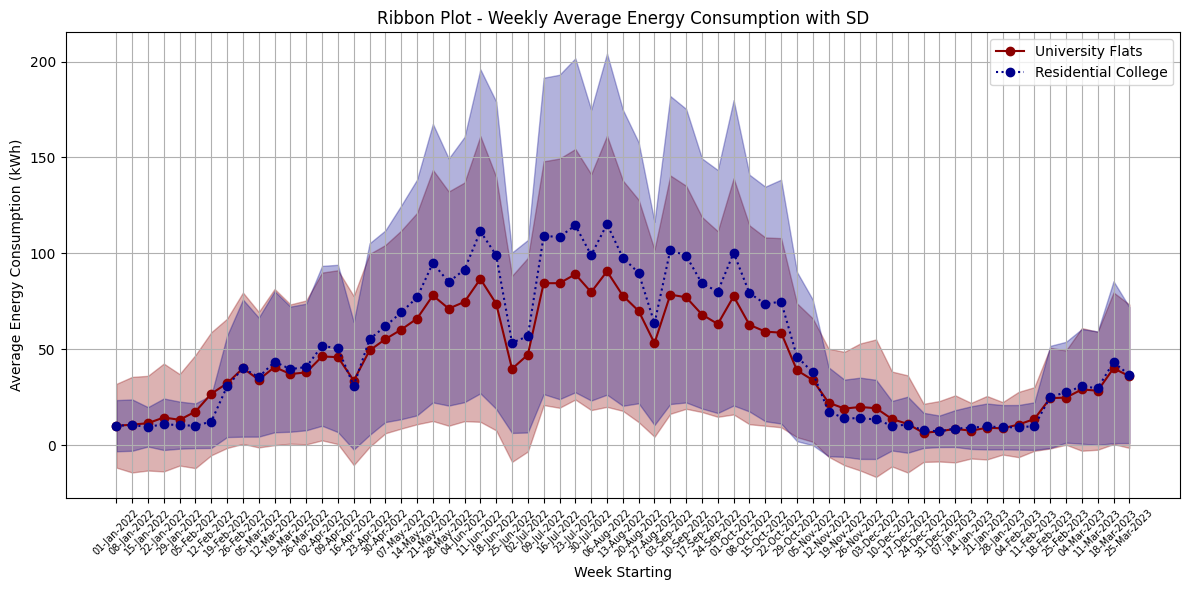

In [ ]:
# Ribbon Plot - Weekly Average Energy Consumption with SD

# Convert the 'Date' column to datetime format and remove extra spaces from column names
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')
energy_data.columns = energy_data.columns.str.strip()

# Custom function to assign each date to a specific week
def assign_custom_week(date):
    start_date = pd.to_datetime('2022-01-01')
    end_date = pd.to_datetime('2023-03-25')
    if date < start_date or date > end_date:
        return None
    else:
        # Calculate the number of weeks since the start date
        week_number = np.floor((date - start_date).days / 7)
        return start_date + pd.to_timedelta(week_number * 7, unit='d')

# Apply the custom function to assign weeks
energy_data['Custom Week'] = energy_data['Date'].apply(assign_custom_week)

# Aggregate data by custom week and category and calculate mean and standard deviation
weekly_data = energy_data.groupby(['Custom Week', 'Flats Category']).agg(
    Mean=('TotaldailyenergyConsumption', 'mean'),
    SD=('TotaldailyenergyConsumption', 'std')
).unstack()

# Extracting the weeks from the dataset for the x-axis labels
actual_weeks = weekly_data.index.strftime('%d-%b-%Y').tolist()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for University Flats
ax.plot(weekly_data.index, weekly_data['Mean', 'University Flats'],
        color='darkred', marker='o', label='University Flats')
ax.fill_between(weekly_data.index,
                weekly_data['Mean', 'University Flats'] - weekly_data['SD', 'University Flats'],
                weekly_data['Mean', 'University Flats'] + weekly_data['SD', 'University Flats'],
                color='darkred', alpha=0.3)

# Plot for Residential College
ax.plot(weekly_data.index, weekly_data['Mean', 'Residential College'],
        color='darkblue', linestyle='dotted', marker='o', label='Residential College')
ax.fill_between(weekly_data.index,
                weekly_data['Mean', 'Residential College'] - weekly_data['SD', 'Residential College'],
                weekly_data['Mean', 'Residential College'] + weekly_data['SD', 'Residential College'],
                color='darkblue', alpha=0.3)

# Setting titles and labels
ax.set_title('Ribbon Plot - Weekly Average Energy Consumption with SD')
ax.set_ylabel('Average Energy Consumption (kWh)')
ax.set_xlabel('Week Starting')
ax.set_xticks(weekly_data.index)
ax.set_xticklabels(actual_weeks, rotation=45, fontsize=7)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


# Daily Average Energy Consumption: University Flats vs Residential College

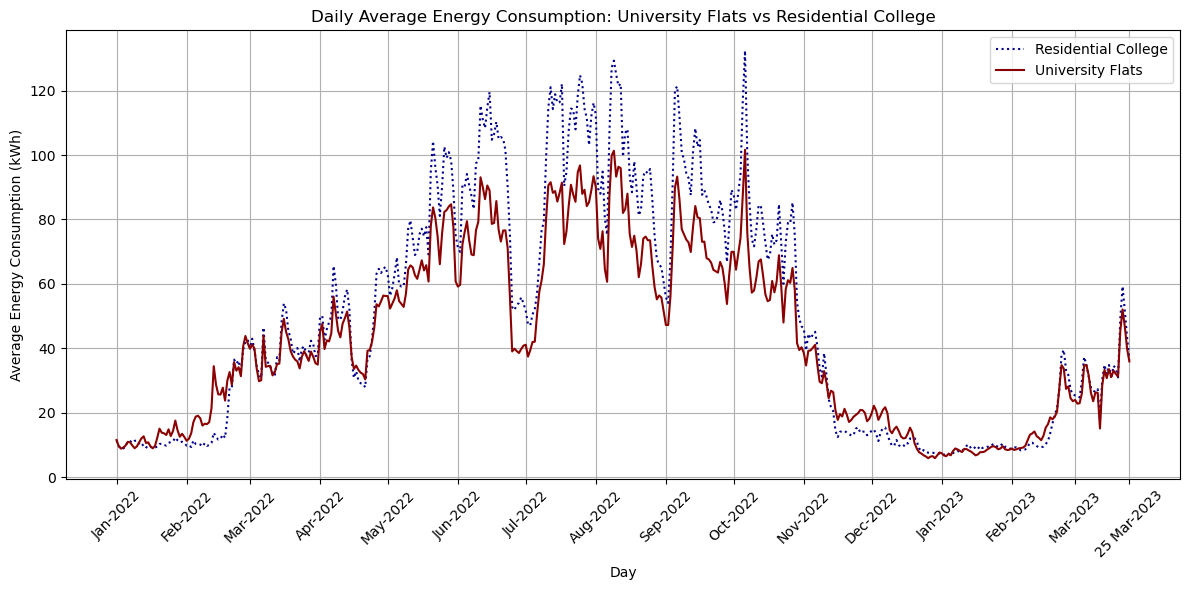

In [ ]:
# Daily Average Energy Consumption: University Flats vs Residential College

# Convert the 'Date' column to datetime format and remove extra spaces from column names
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')
energy_data.columns = energy_data.columns.str.strip()

# Aggregate data by day and category
energy_data['Day'] = energy_data['Date'].dt.to_period('D')
daily_data = energy_data.groupby(['Day', 'Flats Category'])['TotaldailyenergyConsumption'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index.to_timestamp(), daily_data['Residential College'],
         color='darkblue', linestyle='dotted', label='Residential College')
plt.plot(daily_data.index.to_timestamp(), daily_data['University Flats'],
         color='darkred', label='University Flats')

# Setting the x-axis labels to represent 15 months from Jan 2022 to Mar 2023, plus 25 March 2023
daily_labels = [
    'Jan-2022', 'Feb-2022', 'Mar-2022', 'Apr-2022', 'May-2022',
    'Jun-2022', 'Jul-2022', 'Aug-2022', 'Sep-2022', 'Oct-2022',
    'Nov-2022', 'Dec-2022', 'Jan-2023', 'Feb-2023', 'Mar-2023'
]
daily_timestamps = pd.date_range(start='2022-01-01', end='2023-03-01', freq='MS').tolist()
daily_timestamps.append(pd.to_datetime('2023-03-25'))  # Adding the specific date of 25 March 2023

# Ensure the number of labels matches the number of ticks
daily_labels.append('25 Mar-2023')

# Setting the x-axis labels
plt.xticks(daily_timestamps, daily_labels, rotation=45)

# Formatting the plot
plt.title('Daily Average Energy Consumption: University Flats vs Residential College')
plt.xlabel('Day')
plt.ylabel('Average Energy Consumption (kWh)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


# Ribbon Plot - Daily Average Energy Consumption with SD

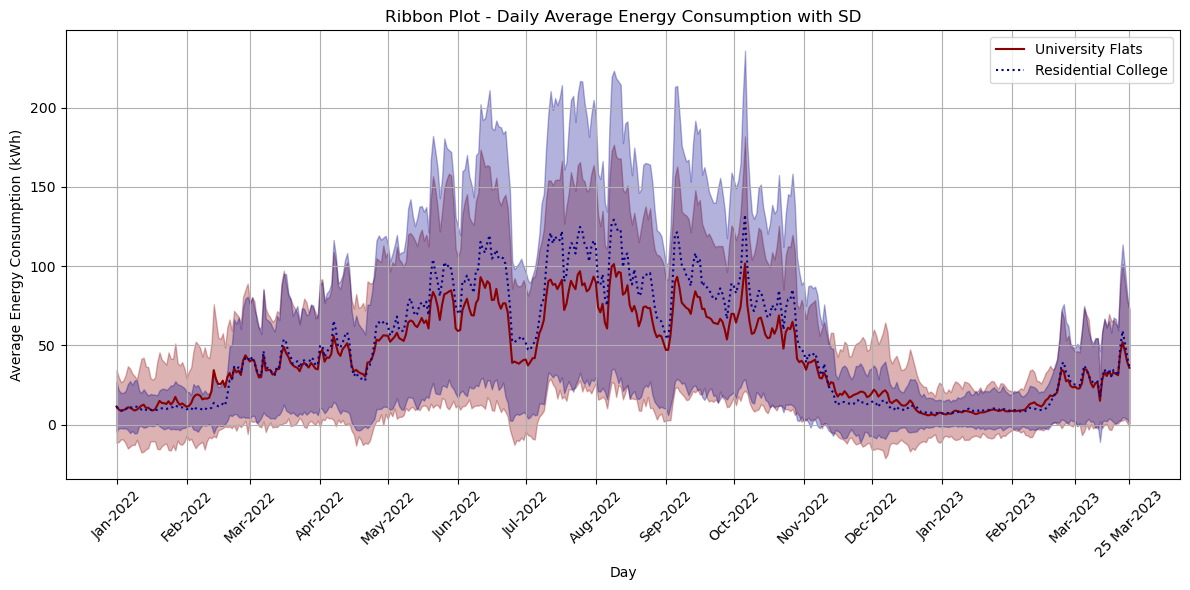

In [ ]:
# Ribbon Plot - Daily Average Energy Consumption with SD

# Convert the 'Date' column to datetime format and remove extra spaces from column names
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')
energy_data.columns = energy_data.columns.str.strip()

# Aggregate data by day and category and calculate mean and standard deviation
energy_data['Day'] = energy_data['Date'].dt.to_period('D')
daily_data = energy_data.groupby(['Day', 'Flats Category']).agg(
    Mean=('TotaldailyenergyConsumption', 'mean'),
    SD=('TotaldailyenergyConsumption', 'std')
).unstack()

# Setting the x-axis labels to represent 15 months from Jan 2022 to Mar 2023, plus 25 March 2023
daily_labels = [
    'Jan-2022', 'Feb-2022', 'Mar-2022', 'Apr-2022', 'May-2022',
    'Jun-2022', 'Jul-2022', 'Aug-2022', 'Sep-2022', 'Oct-2022',
    'Nov-2022', 'Dec-2022', 'Jan-2023', 'Feb-2023', 'Mar-2023', '25 Mar-2023'
]
daily_timestamps = pd.date_range(start='2022-01-01', end='2023-03-25', freq='MS').tolist()
daily_timestamps.append(pd.to_datetime('2023-03-25'))  # Adding the specific date of 25 March 2023

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for University Flats
ax.plot(daily_data.index.to_timestamp(), daily_data['Mean', 'University Flats'],
        color='darkred', label='University Flats')
ax.fill_between(daily_data.index.to_timestamp(),
                daily_data['Mean', 'University Flats'] - daily_data['SD', 'University Flats'],
                daily_data['Mean', 'University Flats'] + daily_data['SD', 'University Flats'],
                color='darkred', alpha=0.3)

# Plot for Residential College
ax.plot(daily_data.index.to_timestamp(), daily_data['Mean', 'Residential College'],
        color='darkblue', linestyle='dotted', label='Residential College')
ax.fill_between(daily_data.index.to_timestamp(),
                daily_data['Mean', 'Residential College'] - daily_data['SD', 'Residential College'],
                daily_data['Mean', 'Residential College'] + daily_data['SD', 'Residential College'],
                color='darkblue', alpha=0.3)

# Setting titles and labels
ax.set_title('Ribbon Plot - Daily Average Energy Consumption with SD')
ax.set_ylabel('Average Energy Consumption (kWh)')
ax.set_xlabel('Day')
ax.set_xticks(daily_timestamps)
ax.set_xticklabels(daily_labels, rotation=45)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


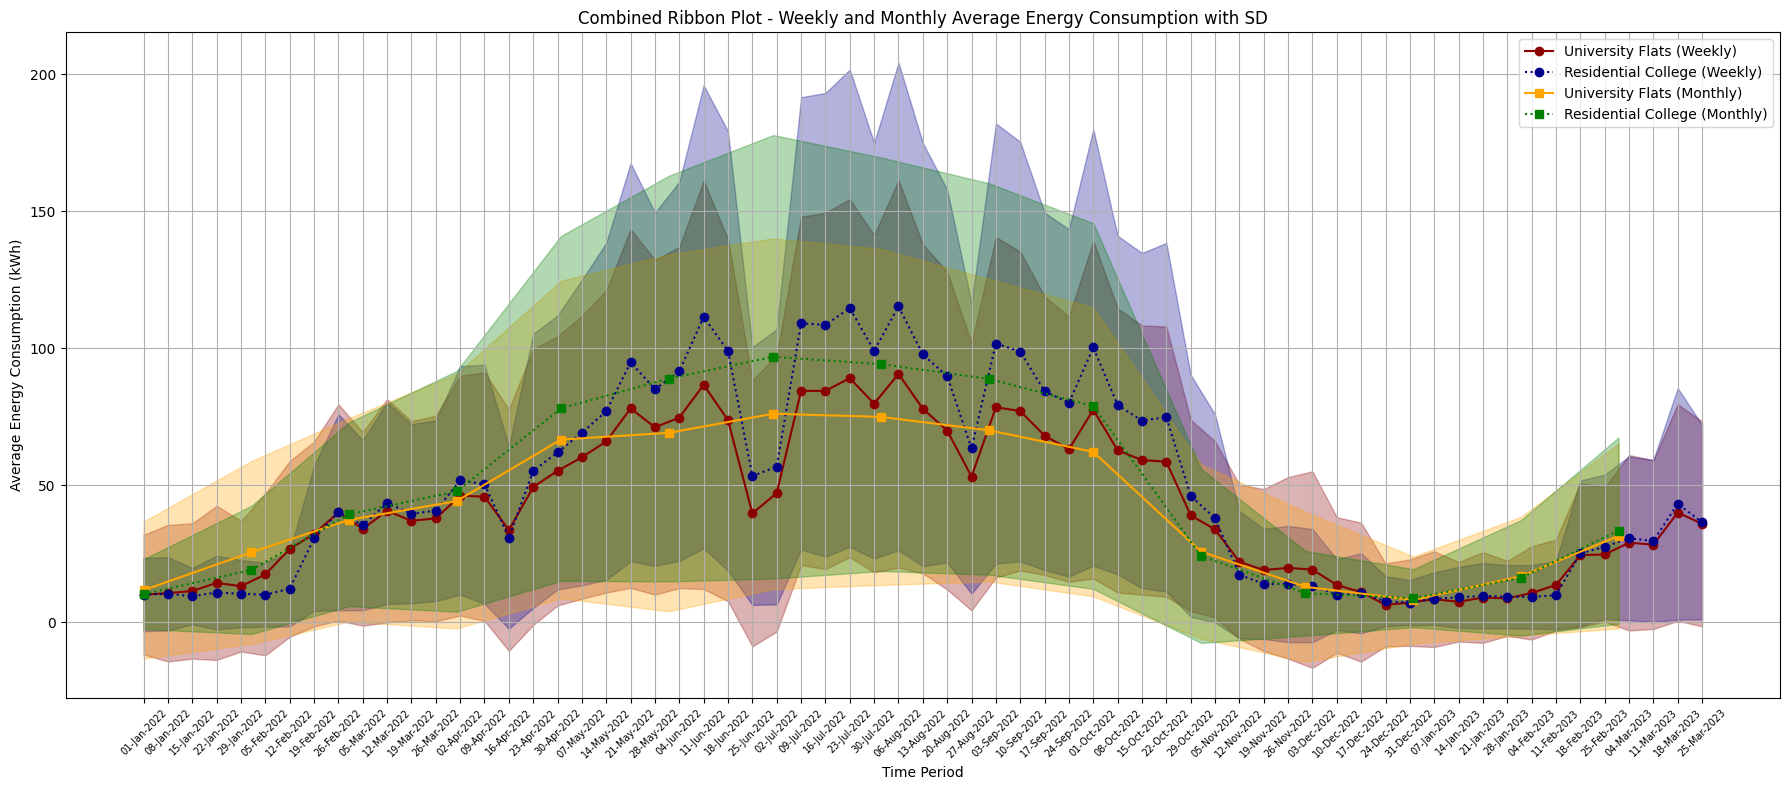

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')
energy_data.columns = energy_data.columns.str.strip()

def assign_custom_week(date):
    start_date = pd.to_datetime('2022-01-01')
    end_date = pd.to_datetime('2023-03-25')
    if date < start_date or date > end_date:
        return None
    else:
        week_number = np.floor((date - start_date).days / 7)
        return start_date + pd.to_timedelta(week_number * 7, unit='d')

energy_data['Custom Week'] = energy_data['Date'].apply(assign_custom_week)

weekly_data = energy_data.groupby(['Custom Week', 'Flats Category']).agg(
    Mean=('TotaldailyenergyConsumption', 'mean'),
    SD=('TotaldailyenergyConsumption', 'std')
).unstack()

actual_weeks = weekly_data.index.strftime('%d-%b-%Y').tolist()

energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')
energy_data['Month'] = energy_data['Date'].dt.to_period('M')
monthly_data = energy_data.groupby(['Month', 'Flats Category']).agg(
    Mean=('TotaldailyenergyConsumption', 'mean'),
    SD=('TotaldailyenergyConsumption', 'std')
).unstack()

daily_labels = [
    'Jan-2022', 'Feb-2022', 'Mar-2022', 'Apr-2022', 'May-2022',
    'Jun-2022', 'Jul-2022', 'Aug-2022', 'Sep-2022', 'Oct-2022',
    'Nov-2022', 'Dec-2022', 'Jan-2023', 'Feb-2023', 'Mar-2023'
]

fig, ax = plt.subplots(figsize=(18, 8))

ax.plot(weekly_data.index, weekly_data['Mean', 'University Flats'],
        color='darkred', marker='o', label='University Flats (Weekly)')
ax.fill_between(weekly_data.index,
                weekly_data['Mean', 'University Flats'] - weekly_data['SD', 'University Flats'],
                weekly_data['Mean', 'University Flats'] + weekly_data['SD', 'University Flats'],
                color='darkred', alpha=0.3)

ax.plot(weekly_data.index, weekly_data['Mean', 'Residential College'],
        color='darkblue', linestyle='dotted', marker='o', label='Residential College (Weekly)')
ax.fill_between(weekly_data.index,
                weekly_data['Mean', 'Residential College'] - weekly_data['SD', 'Residential College'],
                weekly_data['Mean', 'Residential College'] + weekly_data['SD', 'Residential College'],
                color='darkblue', alpha=0.3)

ax.plot(monthly_data.index.to_timestamp(), monthly_data['Mean', 'University Flats'],
        color='orange', marker='s', label='University Flats (Monthly)')
ax.fill_between(monthly_data.index.to_timestamp(),
                monthly_data['Mean', 'University Flats'] - monthly_data['SD', 'University Flats'],
                monthly_data['Mean', 'University Flats'] + monthly_data['SD', 'University Flats'],
                color='orange', alpha=0.3)

ax.plot(monthly_data.index.to_timestamp(), monthly_data['Mean', 'Residential College'],
        color='green', linestyle='dotted', marker='s', label='Residential College (Monthly)')
ax.fill_between(monthly_data.index.to_timestamp(),
                monthly_data['Mean', 'Residential College'] - monthly_data['SD', 'Residential College'],
                monthly_data['Mean', 'Residential College'] + monthly_data['SD', 'Residential College'],
                color='green', alpha=0.3)

ax.set_title('Combined Ribbon Plot - Weekly and Monthly Average Energy Consumption with SD')
ax.set_ylabel('Average Energy Consumption (kWh)')
ax.set_xlabel('Time Period')
ax.set_xticks(weekly_data.index)
ax.set_xticklabels(actual_weeks, rotation=45, fontsize=7)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


# Average Energy Consumption by Time of Day

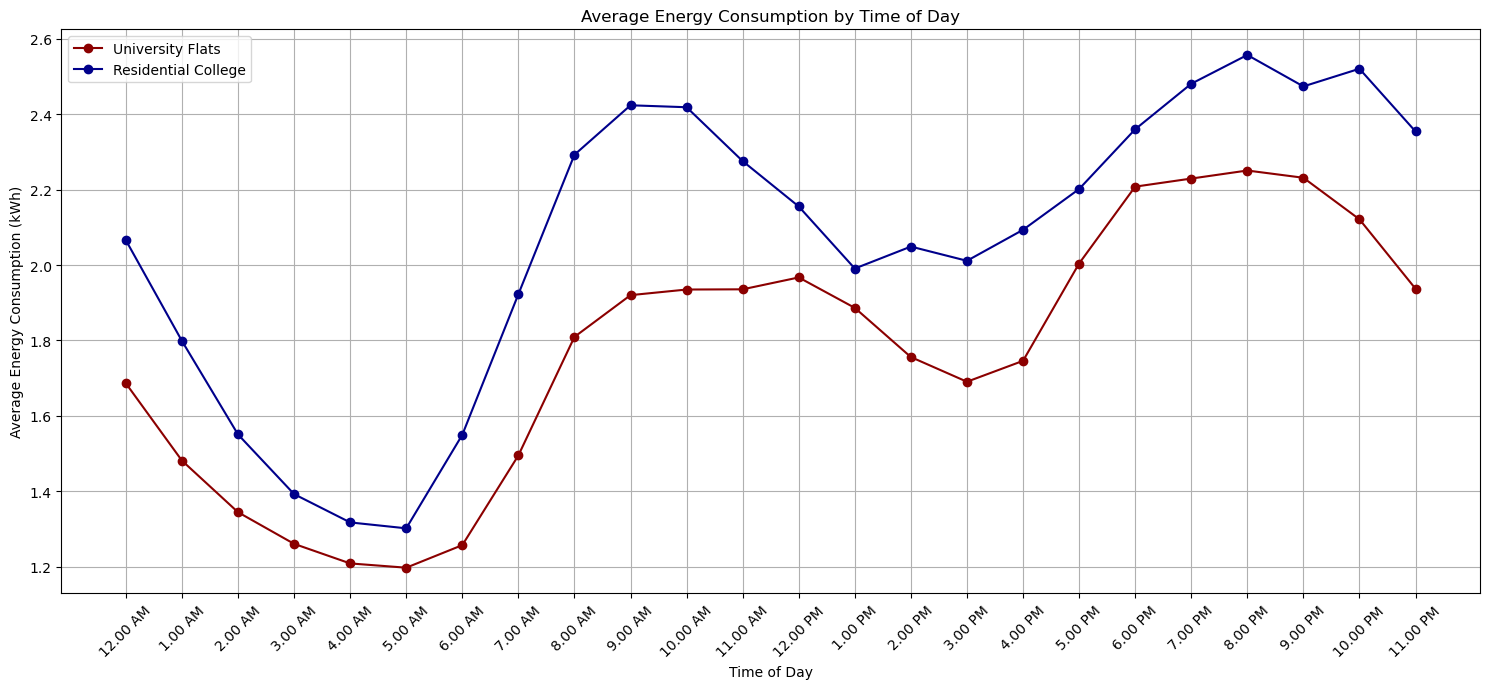

In [ ]:


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Correct time column names to match the DataFrame's columns
time_columns = [
    '12.00 AM', '1.00 AM', '2.00 AM', '3.00 AM', '4.00 AM',
    '5.00 AM', '6.00 AM', '7.00 AM', '8.00 AM', '9.00 AM',
    '10.00 AM', '11.00 AM', '12.00 PM', '1.00 PM', '2.00 PM',
    '3.00 PM', '4.00 PM', '5.00 PM', '6.00 PM', '7.00 PM',
    '8.00 PM', '9.00 PM', '10.00 PM', '11.00 PM'
]

# Splitting the dataset into two based on the 'Flats Category'
university_flats = energy_data[energy_data['Flats Category'] == 'University Flats'][time_columns]
residential_college = energy_data[energy_data['Flats Category'] == 'Residential College'][time_columns]

# Calculating the average energy consumption for each time slot for both categories
uf_time_slot_averages = university_flats.mean()
rc_time_slot_averages = residential_college.mean()

# Creating the plot
plt.figure(figsize=(15, 7))

# Plotting the data
plt.plot(uf_time_slot_averages, label='University Flats', marker='o', color='darkred')
plt.plot(rc_time_slot_averages, label='Residential College', marker='o', color='darkblue')

# Setting the x-axis labels as the time slots
plt.xticks(range(len(time_columns)), time_columns, rotation=45)

# Adding titles and labels
plt.title('Average Energy Consumption by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Energy Consumption (kWh)')

# Adding legend and grid
plt.legend()
plt.grid(True)

# Adjust layout for better visibility
plt.tight_layout()

# Show the plot
plt.show()


# Ribbon Plot - Average and SD for Both Category Flats -3 Tier Low/Med/High  Energy Consumption

In [ ]:

# Ensure that all hour columns are numeric
hour_columns = energy_data.columns[10:]
energy_data[hour_columns] = energy_data[hour_columns].apply(pd.to_numeric, errors='coerce')

# Define the quantiles for the tiers
low_quantile = energy_data['TotaldailyenergyConsumption'].quantile(0.33)
high_quantile = energy_data['TotaldailyenergyConsumption'].quantile(0.66)

# Function to categorize into tiers
def categorize_consumption(value):
    if value <= low_quantile:
        return 'Low'
    elif value <= high_quantile:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization
energy_data['Consumption Tier'] = energy_data['TotaldailyenergyConsumption'].apply(categorize_consumption)

# Color settings
colors = {'Low': ('yellow', 'yellow'), 'Medium': ('blue', 'darkblue'), 'High': ('red', 'darkred')}

def plot_ribbon(data, category, title):
    # Preparing a DataFrame to store hourly average and standard deviation for each tier
    hourly_averages = data.groupby('Consumption Tier')[hour_columns].mean()
    hourly_std = data.groupby('Consumption Tier')[hour_columns].std()

    # Plotting the ribbon plot
    plt.figure(figsize=(18, 8))

    # Plotting for each tier
    for tier in ['Low', 'Medium', 'High']:
        plt.plot(hourly_averages.columns, hourly_averages.loc[tier], label=f'{tier} Consumption - Avg', linewidth=2, color=colors[tier][1])
        plt.fill_between(hourly_averages.columns,
                         hourly_averages.loc[tier] - hourly_std.loc[tier],
                         hourly_averages.loc[tier] + hourly_std.loc[tier],
                         alpha=0.2, label=f'{tier} Consumption - SD', color=colors[tier][0])

    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('Hour of Day')
    plt.ylabel('Energy Consumption (kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Filter data for University Flats and plot
university_flats_data = energy_data[energy_data['Flats Category'] == 'University Flats']
plot_ribbon(university_flats_data, 'University Flats', 'Ribbon Plot - University Flats')

# Filter data for Residential Colleges and plot
residential_college_data = energy_data[energy_data['Flats Category'] == 'Residential College']
plot_ribbon(residential_college_data, 'Residential College', 'Ribbon Plot - Residential College')


# Daily Energy Consumption : Comparison of 2 Profiles (March-22-April-22 vs July-22-August22)

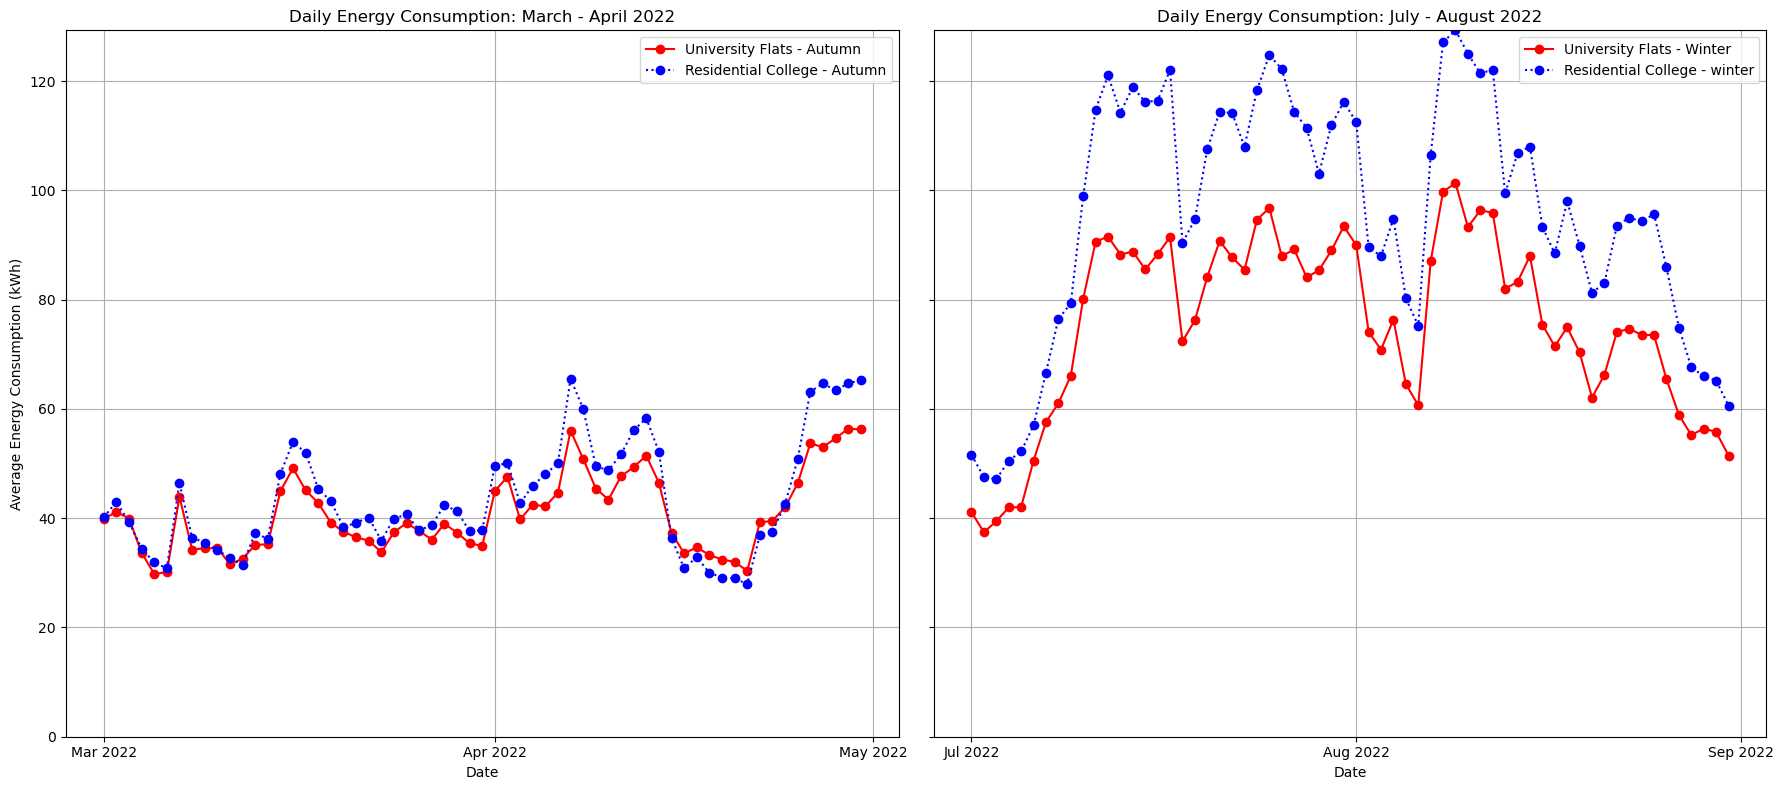

{'March-April 2022 - University Flats': count    61.000000
 mean     40.740071
 std       7.217435
 min      29.793670
 25%      34.949358
 50%      39.227248
 75%      45.117248
 max      56.377890
 Name: University Flats, dtype: float64,
 'March-April 2022 - Residential College': count    61.000000
 mean     43.536998
 std      10.314650
 min      27.914940
 25%      36.356747
 50%      40.688795
 75%      50.055663
 max      65.566145
 Name: Residential College, dtype: float64,
 'July-August 2022 - University Flats': count     62.000000
 mean      75.519748
 std       16.702969
 min       37.433394
 25%       64.774106
 50%       76.282615
 75%       88.686468
 max      101.326422
 Name: University Flats, dtype: float64,
 'July-August 2022 - Residential College': count     62.000000
 mean      95.507493
 std       22.907379
 min       47.125904
 25%       80.500723
 50%       96.840783
 75%      114.403313
 max      129.300723
 Name: Residential College, dtype: float64}

In [ ]:
# Daily Energy Consumption : Comparsion of 2 Profiles (March-22-April-22 vs July-22-August22)

# Convert 'Date' column to datetime format
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')

# Group data by Date and Flats Category and calculate mean of Total daily energy Consumption
daily_data = energy_data.groupby(['Date', 'Flats Category'])['TotaldailyenergyConsumption'].mean().unstack()

# Define the periods for the two plots
period1_start = pd.to_datetime('2022-03-01')
period1_end = pd.to_datetime('2022-04-30')
period2_start = pd.to_datetime('2022-07-01')
period2_end = pd.to_datetime('2022-08-31')

# Filtering data for the specified periods
period1_data = daily_data.loc[period1_start:period1_end]
period2_data = daily_data.loc[period2_start:period2_end]

# Find the max consumption value to set the y-axis limit
max_consumption = max(period1_data.max().max(), period2_data.max().max())

# Creating side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)  # Share y-axis

# Plotting for period 1 (March to April 2022)
axs[0].plot(period1_data.index, period1_data['University Flats'], color='red', marker='o', label='University Flats - Autumn')
axs[0].plot(period1_data.index, period1_data['Residential College'], color='blue', linestyle='dotted', marker='o', label='Residential College - Autumn')
axs[0].set_title('Daily Energy Consumption: March - April 2022')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Average Energy Consumption (kWh)')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs[0].xaxis.set_major_locator(mdates.MonthLocator())
axs[0].set_ylim(0, max_consumption)
axs[0].legend()
axs[0].grid(True)

# Plotting for period 2 (July to August 2022)
axs[1].plot(period2_data.index, period2_data['University Flats'], color='red', marker='o', label='University Flats - Winter')
axs[1].plot(period2_data.index, period2_data['Residential College'], color='blue', linestyle='dotted', marker='o', label='Residential College - winter')
axs[1].set_title('Daily Energy Consumption: July - August 2022')
axs[1].set_xlabel('Date')
# axs[1].set_ylabel('Average Energy Consumption (kWh)')  # No need to set y-label for shared y-axis
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs[1].xaxis.set_major_locator(mdates.MonthLocator())
axs[1].set_ylim(0, max_consumption)
axs[1].legend()
axs[1].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Calculating statistical values for both periods
stats_period1_uni = period1_data['University Flats'].describe()
stats_period1_res = period1_data['Residential College'].describe()
stats_period2_uni = period2_data['University Flats'].describe()
stats_period2_res = period2_data['Residential College'].describe()

# Organizing the results into a dictionary for easier presentation
stats_dict = {
    'March-April 2022 - University Flats': stats_period1_uni,
    'March-April 2022 - Residential College': stats_period1_res,
    'July-August 2022 - University Flats': stats_period2_uni,
    'July-August 2022 - Residential College': stats_period2_res
}

# Print the stats for inspection
stats_dict

# Comparison of 2 Profiles (Jan2022-March2022) vs (Jan2023-March 2023)

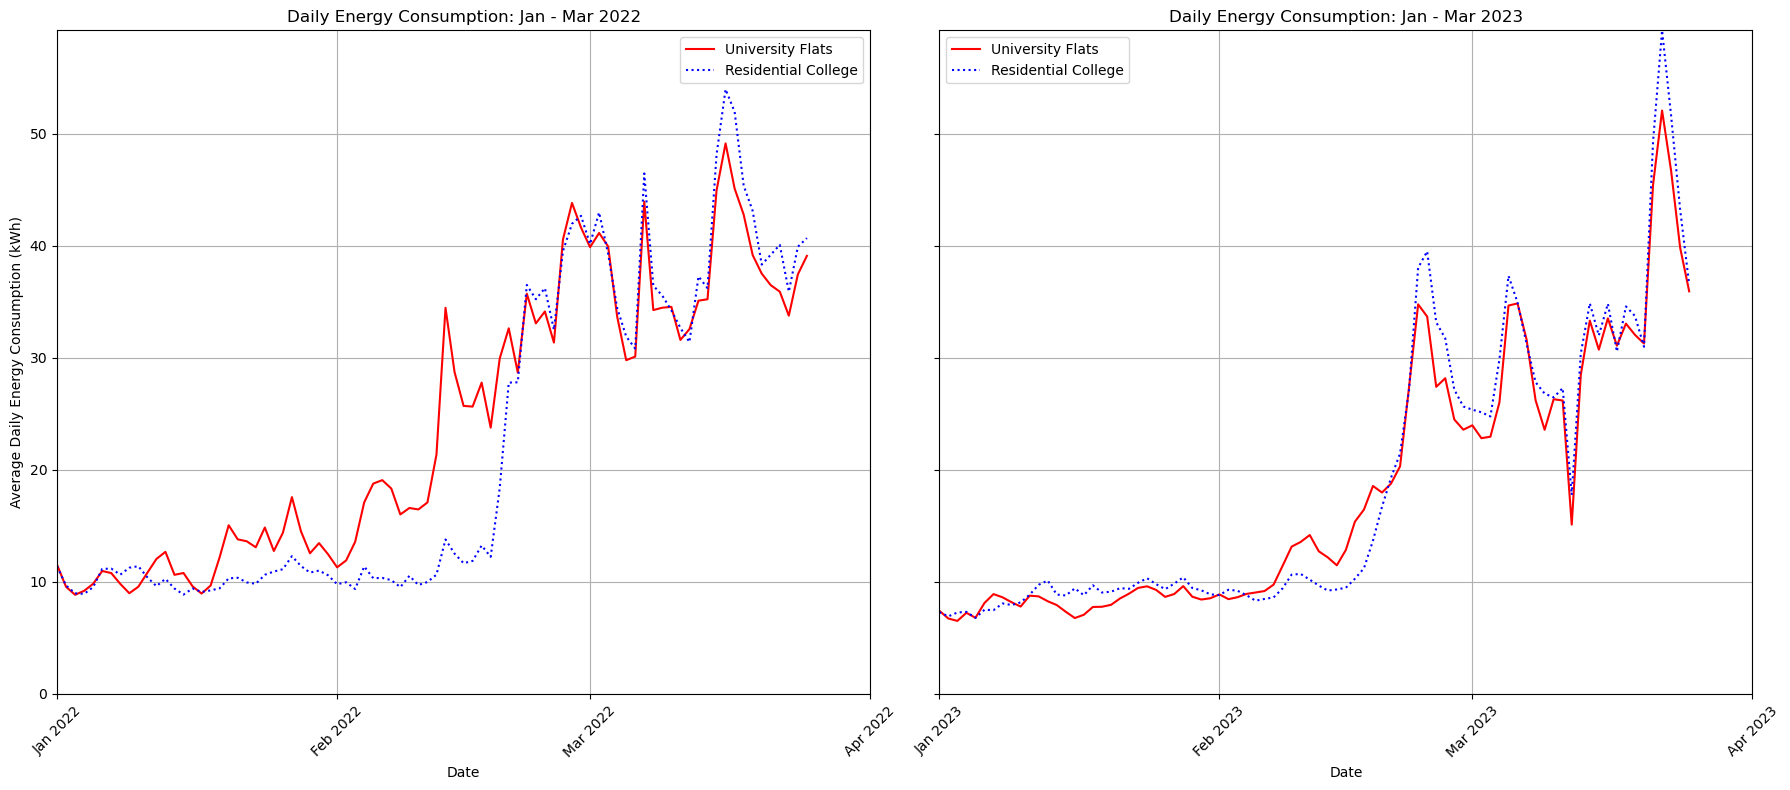

{'Jan-Mar 2022 - University Flats': count    84.000000
 mean     24.022954
 std      12.200850
 min       8.852661
 25%      12.536307
 50%      20.230367
 75%      34.496812
 max      49.143119
 Name: TotaldailyenergyConsumption, dtype: float64,
 'Jan-Mar 2022 - Residential College': count    84.000000
 mean     21.925667
 std      14.282988
 min       8.872410
 25%      10.311054
 50%      11.545843
 75%      36.221235
 max      53.973855
 Name: TotaldailyenergyConsumption, dtype: float64,
 'Jan-Mar 2023 - University Flats': count    84.000000
 mean     18.012373
 std      11.463813
 min       6.523761
 25%       8.633716
 50%      12.798073
 75%      26.586858
 max      52.076239
 Name: TotaldailyenergyConsumption, dtype: float64,
 'Jan-Mar 2023 - Residential College': count    84.000000
 mean     18.639071
 std      12.709588
 min       6.792169
 25%       9.107620
 50%      10.244940
 75%      28.335813
 max      59.235181
 Name: TotaldailyenergyConsumption, dtype: float64}

In [ ]:
# Comparison of 2 Profiles (Jan2022-March2022) vs (Jan2023-March 2023)

# Convert 'Date' column to datetime format
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')

# Define the periods
period1_start = datetime(2022, 1, 1)
period1_end = datetime(2022, 3, 25)
period2_start = datetime(2023, 1, 1)
period2_end = datetime(2023, 3, 25)

# Filtering data for the two periods and the two categories
filtered_data = energy_data[((energy_data['Date'] >= period1_start) & (energy_data['Date'] <= period1_end)) |
                            ((energy_data['Date'] >= period2_start) & (energy_data['Date'] <= period2_end))]
filtered_data_uni = filtered_data[filtered_data['Flats Category'] == 'University Flats']
filtered_data_res = filtered_data[filtered_data['Flats Category'] == 'Residential College']

# Grouping the data by Date and Flats Category to get daily total energy consumption
grouped_data_uni = filtered_data_uni.groupby('Date')['TotaldailyenergyConsumption'].mean()
grouped_data_res = filtered_data_res.groupby('Date')['TotaldailyenergyConsumption'].mean()

# Splitting the data into two periods for separate plots
period1_data_uni = grouped_data_uni.loc[period1_start:period1_end]
period2_data_uni = grouped_data_uni.loc[period2_start:period2_end]
period1_data_res = grouped_data_res.loc[period1_start:period1_end]
period2_data_res = grouped_data_res.loc[period2_start:period2_end]

# Find the max consumption value to set the y-axis limit for both subplots
max_consumption = max(period1_data_uni.max(), period2_data_uni.max(), period1_data_res.max(), period2_data_res.max())

# Creating side-by-side subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Plotting for period 1 (Jan to Mar 2022) on the first subplot
axs[0].plot(period1_data_uni.index, period1_data_uni, color='red', label='University Flats')
axs[0].plot(period1_data_res.index, period1_data_res, color='blue', linestyle='dotted', label='Residential College')
axs[0].set_title('Daily Energy Consumption: Jan - Mar 2022')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Average Daily Energy Consumption (kWh)')
axs[0].xaxis.set_major_formatter(DateFormatter("%b %Y"))
axs[0].xaxis.set_major_locator(mdates.MonthLocator())
axs[0].set_xlim(period1_start, datetime(2022, 4, 1))
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylim(0, max_consumption)
axs[0].legend()
axs[0].grid(True)

# Plotting for period 2 (Jan to Mar 2023) on the second subplot
axs[1].plot(period2_data_uni.index, period2_data_uni, color='red', label='University Flats')
axs[1].plot(period2_data_res.index, period2_data_res, color='blue', linestyle='dotted', label='Residential College')
axs[1].set_title('Daily Energy Consumption: Jan - Mar 2023')
axs[1].set_xlabel('Date')
axs[1].xaxis.set_major_formatter(DateFormatter("%b %Y"))
axs[1].xaxis.set_major_locator(mdates.MonthLocator())
axs[1].set_xlim(period2_start, datetime(2023, 4, 1))
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_ylim(0, max_consumption)
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# Calculating statistical values for both periods and categories

# Statistics for period 1 (Jan to Mar 2022)
stats_period1_uni = period1_data_uni.describe()
stats_period1_res = period1_data_res.describe()

# Statistics for period 2 (Jan to Mar 2023)
stats_period2_uni = period2_data_uni.describe()
stats_period2_res = period2_data_res.describe()

# Organizing the results into a dictionary for easier presentation
stats_dict = {
    'Jan-Mar 2022 - University Flats': stats_period1_uni,
    'Jan-Mar 2022 - Residential College': stats_period1_res,
    'Jan-Mar 2023 - University Flats': stats_period2_uni,
    'Jan-Mar 2023 - Residential College': stats_period2_res
}

stats_dict

# Weekly Average Energy Consumption:Comparsion  - Jan-Mar 2022 Vs Jan-Mar2023

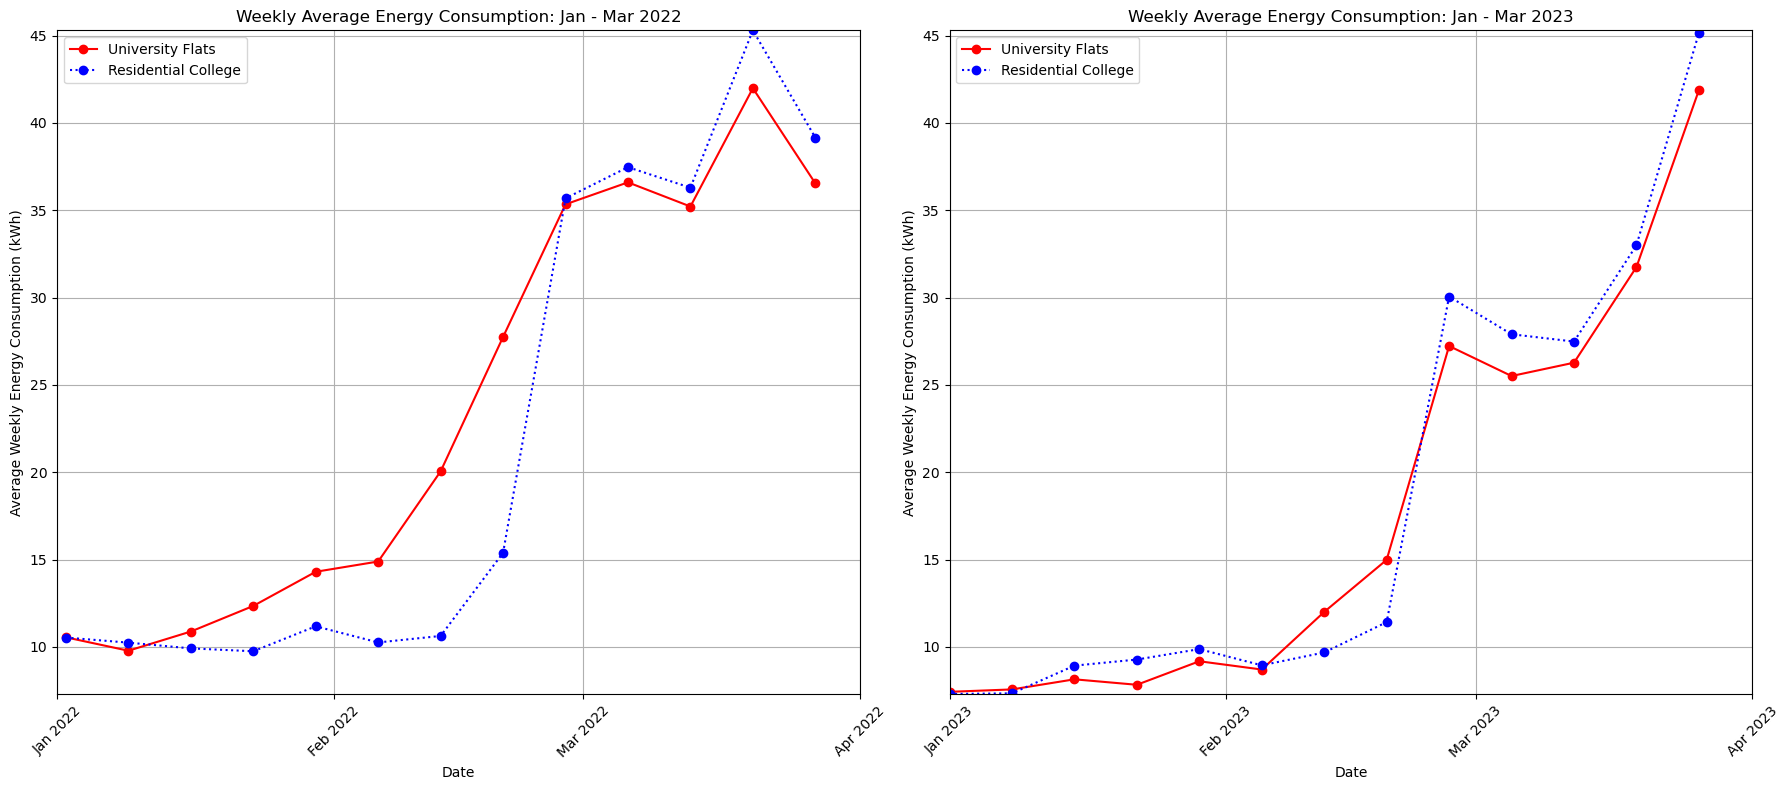

{'Jan-Mar 2022 - University Flats (Weekly)': count    13.000000
 mean     23.557897
 std      12.210225
 min       9.783617
 25%      12.347903
 50%      20.053303
 75%      35.341324
 max      41.989567
 Name: TotaldailyenergyConsumption, dtype: float64,
 'Jan-Mar 2022 - Residential College (Weekly)': count    13.000000
 mean     21.678712
 std      14.319254
 min       9.753219
 25%      10.258107
 50%      11.181566
 75%      36.293580
 max      45.303098
 Name: TotaldailyenergyConsumption, dtype: float64,
 'Jan-Mar 2023 - University Flats (Weekly)': count    13.000000
 mean     17.576880
 std      11.536331
 min       7.430000
 25%       8.146356
 50%      12.005636
 75%      26.274404
 max      41.876697
 Name: TotaldailyenergyConsumption, dtype: float64,
 'Jan-Mar 2023 - Residential College (Weekly)': count    13.000000
 mean     18.183248
 std      12.720568
 min       7.307108
 25%       8.947263
 50%       9.875680
 75%      27.902478
 max      45.150984
 Name: Totaldailyenerg

In [ ]:
# Weekly Average Energy Consumption:Comparsion  - Jan-Mar 2022 Vs Jan-Mar2023

# Convert 'Date' column to datetime format
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')

# Define the periods
period1_start = datetime(2022, 1, 1)
period1_end = datetime(2022, 3, 25)
period2_start = datetime(2023, 1, 1)
period2_end = datetime(2023, 3, 25)

# Filtering data for the two periods and the two categories
filtered_data = energy_data[((energy_data['Date'] >= period1_start) & (energy_data['Date'] <= period1_end)) |
                            ((energy_data['Date'] >= period2_start) & (energy_data['Date'] <= period2_end))]
filtered_data_uni = filtered_data[filtered_data['Flats Category'] == 'University Flats']
filtered_data_res = filtered_data[filtered_data['Flats Category'] == 'Residential College']

# Grouping the data by Date and Flats Category to get daily total energy consumption
grouped_data_uni = filtered_data_uni.groupby('Date')['TotaldailyenergyConsumption'].mean()
grouped_data_res = filtered_data_res.groupby('Date')['TotaldailyenergyConsumption'].mean()

# Splitting the data into two periods for separate plots
period1_data_uni = grouped_data_uni[(grouped_data_uni.index >= period1_start) & (grouped_data_uni.index <= period1_end)]
period2_data_uni = grouped_data_uni[(grouped_data_uni.index >= period2_start) & (grouped_data_uni.index <= period2_end)]
period1_data_res = grouped_data_res[(grouped_data_res.index >= period1_start) & (grouped_data_res.index <= period1_end)]
period2_data_res = grouped_data_res[(grouped_data_res.index >= period2_start) & (grouped_data_res.index <= period2_end)]

# Calculating weekly average energy consumption
period1_data_uni_weekly = period1_data_uni.resample('W').mean()
period1_data_res_weekly = period1_data_res.resample('W').mean()
period2_data_uni_weekly = period2_data_uni.resample('W').mean()
period2_data_res_weekly = period2_data_res.resample('W').mean()

# Function to format x-axis
def format_xaxis(ax, period_start, period_end):
    ax.set_xlim(period_start, datetime(period_end.year, period_end.month + 1, 1)) # Extending to the first day of the next month
    ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.tick_params(axis='x', rotation=45)

# Calculate the overall min and max values for the y-axis
all_values = np.concatenate([period1_data_uni_weekly, period1_data_res_weekly,
                             period2_data_uni_weekly, period2_data_res_weekly])
y_min, y_max = all_values.min(), all_values.max()

# Creating side-by-side subplots for weekly averages
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Plotting weekly averages for period 1
axs[0].plot(period1_data_uni_weekly.index, period1_data_uni_weekly, color='red', marker='o', label='University Flats')
axs[0].plot(period1_data_res_weekly.index, period1_data_res_weekly, color='blue', linestyle='dotted', marker='o', label='Residential College')
axs[0].set_title('Weekly Average Energy Consumption: Jan - Mar 2022')
format_xaxis(axs[0], period1_start, period1_end)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Average Weekly Energy Consumption (kWh)')
axs[0].set_ylim(y_min, y_max)  # Set the same y-axis limits
axs[0].legend()
axs[0].grid(True)

# Plotting weekly averages for period 2
axs[1].plot(period2_data_uni_weekly.index, period2_data_uni_weekly, color='red', marker='o', label='University Flats')
axs[1].plot(period2_data_res_weekly.index, period2_data_res_weekly, color='blue', linestyle='dotted', marker='o', label='Residential College')
axs[1].set_title('Weekly Average Energy Consumption: Jan - Mar 2023')
format_xaxis(axs[1], period2_start, period2_end)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Average Weekly Energy Consumption (kWh)')
axs[1].set_ylim(y_min, y_max)  # Set the same y-axis limits
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Calculating statistical values for the weekly data

# Statistics for weekly period 1 (Jan to Mar 2022)
stats_weekly_period1_uni = period1_data_uni_weekly.describe()
stats_weekly_period1_res = period1_data_res_weekly.describe()

# Statistics for weekly period 2 (Jan to Mar 2023)
stats_weekly_period2_uni = period2_data_uni_weekly.describe()
stats_weekly_period2_res = period2_data_res_weekly.describe()

# Organizing the results into a dictionary for easier presentation
stats_weekly_dict = {
    'Jan-Mar 2022 - University Flats (Weekly)': stats_weekly_period1_uni,
    'Jan-Mar 2022 - Residential College (Weekly)': stats_weekly_period1_res,
    'Jan-Mar 2023 - University Flats (Weekly)': stats_weekly_period2_uni,
    'Jan-Mar 2023 - Residential College (Weekly)': stats_weekly_period2_res
}

stats_weekly_dict


# Comparsion of 2 Profiles WEEKLY AVERAGE ENERGY CONSUMPTION -  (Jan2022-March2022) vs (Jan2023-March 2023)

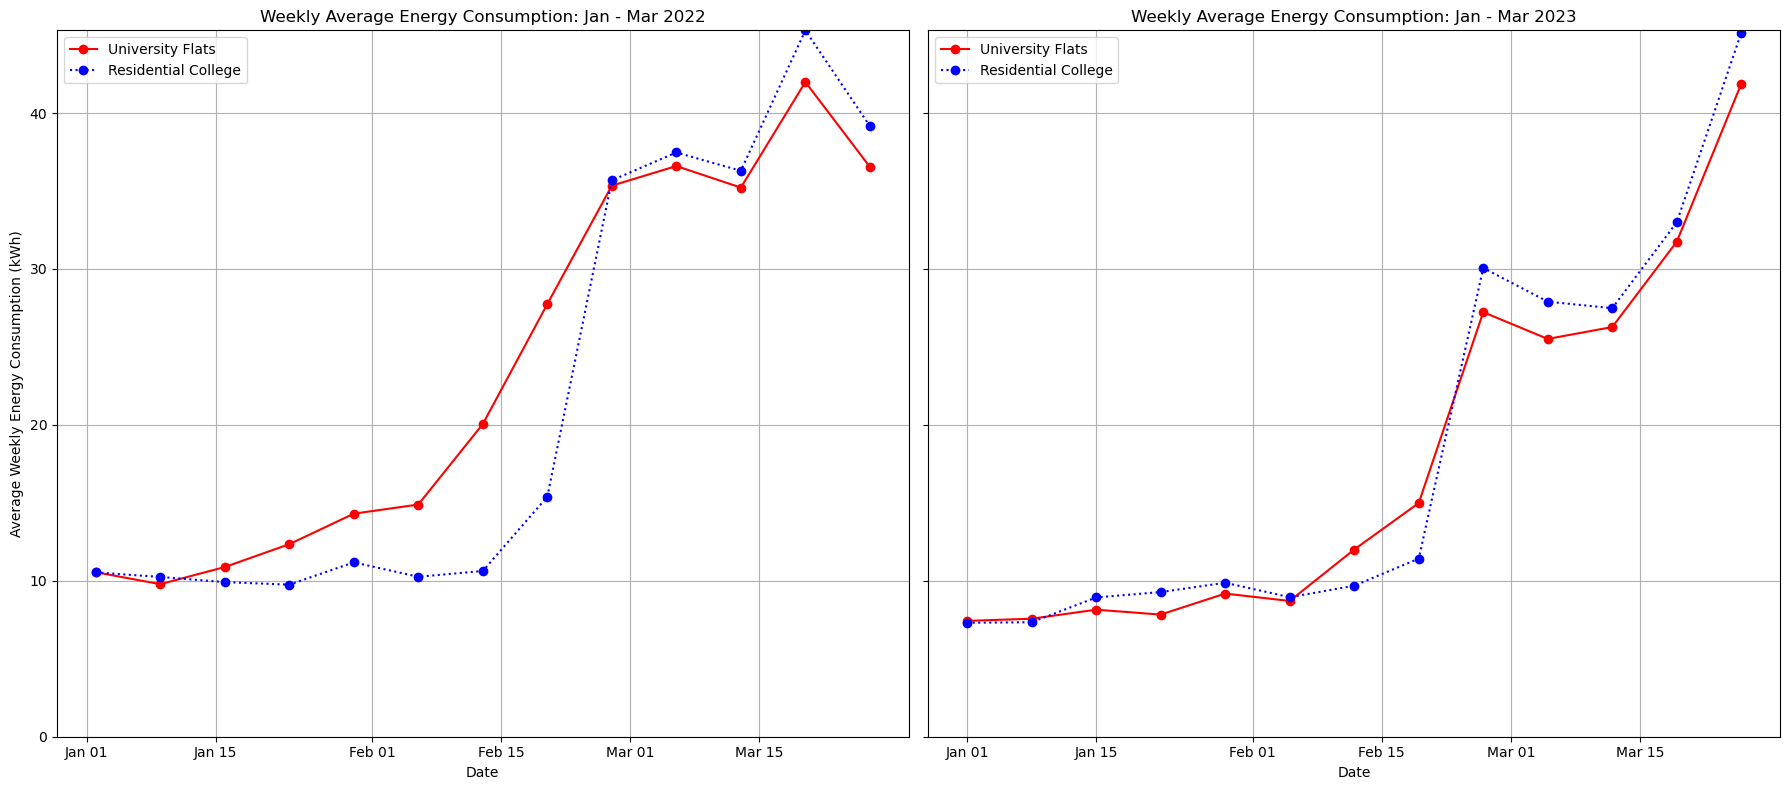

Statistics for Weekly Average Energy Consumption (Jan - Mar 2022)
University Flats:
 count    13.000000
mean     23.557897
std      12.210225
min       9.783617
25%      12.347903
50%      20.053303
75%      35.341324
max      41.989567
Name: University Flats, dtype: float64

Residential College:
 count    13.000000
mean     21.678712
std      14.319254
min       9.753219
25%      10.258107
50%      11.181566
75%      36.293580
max      45.303098
Name: Residential College, dtype: float64

Statistics for Weekly Average Energy Consumption (Jan - Mar 2023)
University Flats:
 count    13.000000
mean     17.576880
std      11.536331
min       7.430000
25%       8.146356
50%      12.005636
75%      26.274404
max      41.876697
Name: University Flats, dtype: float64

Residential College:
 count    13.000000
mean     18.183248
std      12.720568
min       7.307108
25%       8.947263
50%       9.875680
75%      27.902478
max      45.150984
Name: Residential College, dtype: float64


In [ ]:
# Comparsion of 2 Profiles WEEKLY AVERAGE ENERGY CONSUMPTION -  (Jan2022-March2022) vs (Jan2023-March 2023)

# Convert 'Date' column to datetime format
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')

# Define the periods
period1_start = datetime(2022, 1, 1)
period1_end = datetime(2022, 3, 25)
period2_start = datetime(2023, 1, 1)
period2_end = datetime(2023, 3, 25)

# Filtering data for the two periods and the two categories
filtered_data = energy_data[((energy_data['Date'] >= period1_start) & (energy_data['Date'] <= period1_end)) |
                            ((energy_data['Date'] >= period2_start) & (energy_data['Date'] <= period2_end))]
filtered_data_uni = filtered_data[filtered_data['Flats Category'] == 'University Flats']
filtered_data_res = filtered_data[filtered_data['Flats Category'] == 'Residential College']

# Grouping the data by Date and Flats Category to get daily total energy consumption
grouped_data = filtered_data.groupby(['Date', 'Flats Category'])['TotaldailyenergyConsumption'].mean().unstack()

# Splitting the data into two periods for separate analysis
period1_data = grouped_data.loc[period1_start:period1_end]
period2_data = grouped_data.loc[period2_start:period2_end]

# Calculating weekly average energy consumption
period1_data_weekly = period1_data.resample('W').mean()
period2_data_weekly = period2_data.resample('W').mean()

# Find the max consumption value to set the y-axis limit for both subplots
max_weekly_consumption = max(period1_data_weekly.max().max(), period2_data_weekly.max().max())

# Creating side-by-side subplots for weekly averages with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Plotting weekly averages for period 1 (Jan to Mar 2022)
axs[0].plot(period1_data_weekly.index, period1_data_weekly['University Flats'], color='red', marker='o', label='University Flats')
axs[0].plot(period1_data_weekly.index, period1_data_weekly['Residential College'], color='blue', linestyle='dotted', marker='o', label='Residential College')
axs[0].set_title('Weekly Average Energy Consumption: Jan - Mar 2022')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Average Weekly Energy Consumption (kWh)')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
axs[0].legend()
axs[0].grid(True)
axs[0].set_ylim(0, max_weekly_consumption)

# Plotting weekly averages for period 2 (Jan to Mar 2023)
axs[1].plot(period2_data_weekly.index, period2_data_weekly['University Flats'], color='red', marker='o', label='University Flats')
axs[1].plot(period2_data_weekly.index, period2_data_weekly['Residential College'], color='blue', linestyle='dotted', marker='o', label='Residential College')
axs[1].set_title('Weekly Average Energy Consumption: Jan - Mar 2023')
axs[1].set_xlabel('Date')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
axs[1].legend()
axs[1].grid(True)
axs[1].set_ylim(0, max_weekly_consumption)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Calculating statistics for period 1 (Jan to Mar 2022)
period1_stats_uni = period1_data_weekly['University Flats'].describe()
period1_stats_res = period1_data_weekly['Residential College'].describe()

# Calculating statistics for period 2 (Jan to Mar 2023)
period2_stats_uni = period2_data_weekly['University Flats'].describe()
period2_stats_res = period2_data_weekly['Residential College'].describe()

# Displaying the statistics
print("Statistics for Weekly Average Energy Consumption (Jan - Mar 2022)")
print("University Flats:\n", period1_stats_uni)
print("\nResidential College:\n", period1_stats_res)

print("\nStatistics for Weekly Average Energy Consumption (Jan - Mar 2023)")
print("University Flats:\n", period2_stats_uni)
print("\nResidential College:\n", period2_stats_res)

# Monthly Energy Consumption Boxplot for University Flats (Jan 2022 - Mar 2023)

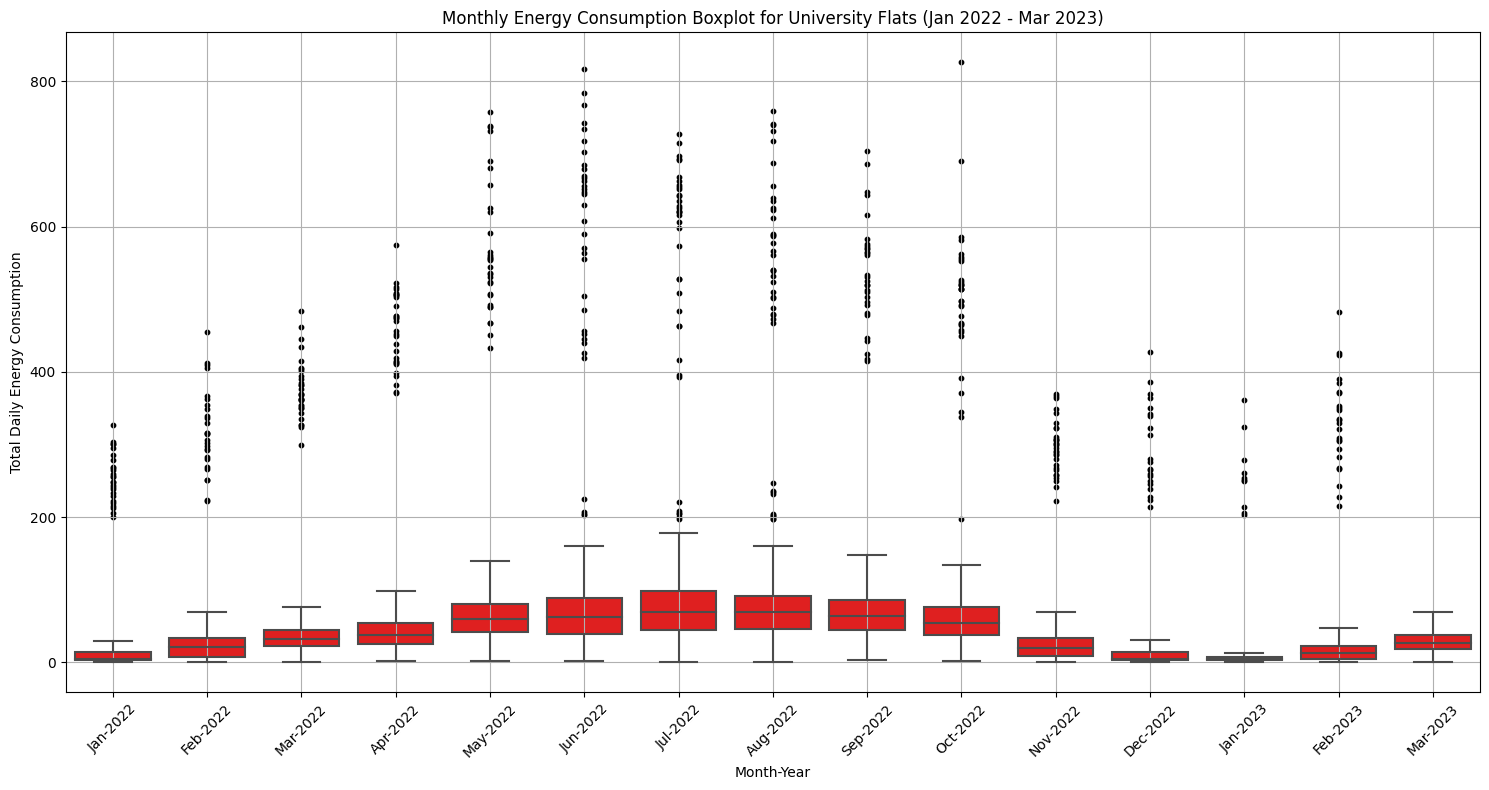

Statistics for Total Daily Energy Consumption at University Flats:
count    48941.000000
mean        42.556949
std         51.382372
min          0.000000
25%          9.150000
50%         31.840000
75%         60.150000
max        826.100000
Name: TotaldailyenergyConsumption, dtype: float64


In [ ]:
# Monthly Energy Consumption Boxplot for University Flats (Jan 2022 - Mar 2023) - PLOT



# Load the energy dataset
file_path = '/content/PROCESSED-Energy-Dataset-212-FINAL.csv'
energy_data = pd.read_csv(file_path)


# Filtering data for 'University Flats' only
uni_flats_data = energy_data[energy_data['Flats Category'] == 'University Flats']

# Filtering data for 'University Flats' only and creating a copy to avoid SettingWithCopyWarning
uni_flats_data = energy_data[energy_data['Flats Category'] == 'University Flats'].copy()

# Converting 'Date' to datetime format and extracting month-year for plotting
uni_flats_data['Date'] = pd.to_datetime(uni_flats_data['Date'], format='%d/%m/%Y')
uni_flats_data['Month-Year'] = uni_flats_data['Date'].dt.strftime('%b-%Y')

# Filtering the dates as per the given range (Jan 2022 to Mar 2023)
start_date = datetime.strptime('01-01-2022', '%d-%m-%Y')
end_date = datetime.strptime('25-03-2023', '%d-%m-%Y')
filtered_data = uni_flats_data[(uni_flats_data['Date'] >= start_date) & (uni_flats_data['Date'] <= end_date)]

# Preparing data for boxplot
plot_data = filtered_data[['Month-Year', 'TotaldailyenergyConsumption']]

# Creating the boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Month-Year', y='TotaldailyenergyConsumption', data=plot_data, color='red', showfliers=False)

# Calculating the standard deviation for outliers
std_dev = plot_data['TotaldailyenergyConsumption'].std()
mean = plot_data['TotaldailyenergyConsumption'].mean()

# Adding outlier data points with +/- 3SD
outliers = plot_data[(plot_data['TotaldailyenergyConsumption'] > mean + 3 * std_dev) |
                     (plot_data['TotaldailyenergyConsumption'] < mean - 3 * std_dev)]

plt.scatter(outliers['Month-Year'], outliers['TotaldailyenergyConsumption'], color='black', s=10)

# Improving the plot aesthetics
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Monthly Energy Consumption Boxplot for University Flats (Jan 2022 - Mar 2023)')
plt.xlabel('Month-Year')
plt.ylabel('Total Daily Energy Consumption')
plt.tight_layout()

# Displaying the plot
plt.show()

#############################
# Printing statistics
print("Statistics for Total Daily Energy Consumption at University Flats:")
print(filtered_data['TotaldailyenergyConsumption'].describe())


In [ ]:
# OUTLIER - FOR UNIVERSITY FLATS

# Filtering data for 'University Flats' only
univ_flat_data = energy_data[energy_data['Flats Category'] == 'University Flats'].copy()

# Converting 'Date' to datetime format
univ_flat_data['Date'] = pd.to_datetime(univ_flat_data['Date'], format='%d/%m/%Y')

# Filtering the dates as per the given range (Jan 2022 to Mar 2023)
start_date = datetime.strptime('01-01-2022', '%d-%m-%Y')
end_date = datetime.strptime('25-03-2023', '%d-%m-%Y')
filtered_data = univ_flat_data[(univ_flat_data['Date'] >= start_date) & (univ_flat_data['Date'] <= end_date)]

# Calculating overall standard deviation and mean for outliers
overall_std_dev = filtered_data['TotaldailyenergyConsumption'].std()
overall_mean = filtered_data['TotaldailyenergyConsumption'].mean()

# Identifying overall outliers based on +/- 3 standard deviations from the mean
overall_outliers = filtered_data[(filtered_data['TotaldailyenergyConsumption'] > overall_mean + 3 * overall_std_dev) |
                                 (filtered_data['TotaldailyenergyConsumption'] < overall_mean - 3 * overall_std_dev)]

# Extracting unique Smart Meter IDs and Street names for overall outliers
unique_overall_outliers = overall_outliers[['Smart Meter Id', 'Street']].drop_duplicates()

# Displaying unique overall outliers
unique_overall_outliers


,Smart Meter Id,Street
17960,0000002867DED9E,Cumberland Street
32489,0000003274DE059,Cumberland Street
41021,0000003686DECCA,Dundas street


# Monthly Energy Consumption Boxplot for Residential College (Jan 2022 - Mar 2023)

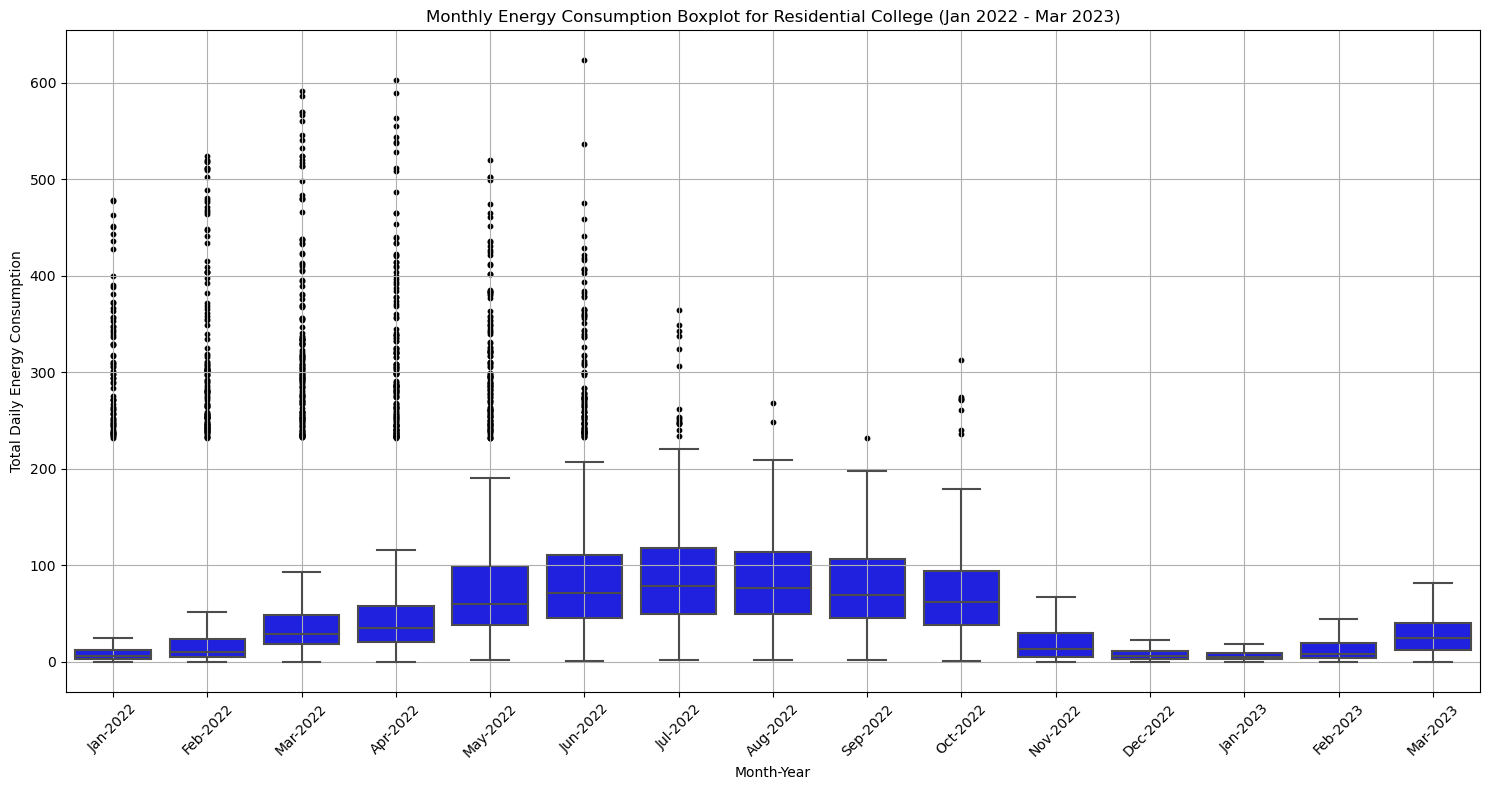

Statistics for Total Daily Energy Consumption at University Flats:
count    37267.000000
mean        49.557481
std         60.794040
min          0.000000
25%          7.820000
50%         29.710000
75%         68.430000
max        622.960000
Name: TotaldailyenergyConsumption, dtype: float64


In [ ]:
# Monthly Energy Consumption Boxplot for Residential College (Jan 2022 - Mar 2023) - PLOT
# Load the dataset

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Filtering data for 'University Flats' only
uni_flats_data = energy_data[energy_data['Flats Category'] == 'Residential College']

# Filtering data for 'University Flats' only and creating a copy to avoid SettingWithCopyWarning
uni_flats_data = energy_data[energy_data['Flats Category'] == 'Residential College'].copy()

# Converting 'Date' to datetime format and extracting month-year for plotting
uni_flats_data['Date'] = pd.to_datetime(uni_flats_data['Date'], format='%d/%m/%Y')
uni_flats_data['Month-Year'] = uni_flats_data['Date'].dt.strftime('%b-%Y')

# Filtering the dates as per the given range (Jan 2022 to Mar 2023)
start_date = datetime.strptime('01-01-2022', '%d-%m-%Y')
end_date = datetime.strptime('25-03-2023', '%d-%m-%Y')
filtered_data = uni_flats_data[(uni_flats_data['Date'] >= start_date) & (uni_flats_data['Date'] <= end_date)]

# Preparing data for boxplot
plot_data = filtered_data[['Month-Year', 'TotaldailyenergyConsumption']]

# Creating the boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Month-Year', y='TotaldailyenergyConsumption', data=plot_data, color='blue', showfliers=False)

# Calculating the standard deviation for outliers
std_dev = plot_data['TotaldailyenergyConsumption'].std()
mean = plot_data['TotaldailyenergyConsumption'].mean()

# Adding outlier data points with +/- 3SD
outliers = plot_data[(plot_data['TotaldailyenergyConsumption'] > mean + 3 * std_dev) |
                     (plot_data['TotaldailyenergyConsumption'] < mean - 3 * std_dev)]

plt.scatter(outliers['Month-Year'], outliers['TotaldailyenergyConsumption'], color='black', s=10)

# Improving the plot aesthetics
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Monthly Energy Consumption Boxplot for Residential College (Jan 2022 - Mar 2023)')
plt.xlabel('Month-Year')
plt.ylabel('Total Daily Energy Consumption')
plt.tight_layout()

# Displaying the plot
plt.show()

#############################
# Printing statistics
print("Statistics for Total Daily Energy Consumption at University Flats:")
print(filtered_data['TotaldailyenergyConsumption'].describe())

In [ ]:
# OUTLIER - FOR Residential College

# Filtering data for 'Residential College' only
res_college_data = energy_data[energy_data['Flats Category'] == 'Residential College'].copy()

# Converting 'Date' to datetime format
res_college_data['Date'] = pd.to_datetime(res_college_data['Date'], format='%d/%m/%Y')

# Filtering the dates as per the given range (Jan 2022 to Mar 2023)
start_date = datetime.strptime('01-01-2022', '%d-%m-%Y')
end_date = datetime.strptime('25-03-2023', '%d-%m-%Y')
filtered_data = res_college_data[(res_college_data['Date'] >= start_date) & (res_college_data['Date'] <= end_date)]

# Calculating overall standard deviation and mean for outliers
overall_std_dev = filtered_data['TotaldailyenergyConsumption'].std()
overall_mean = filtered_data['TotaldailyenergyConsumption'].mean()

# Identifying overall outliers based on +/- 3 standard deviations from the mean
overall_outliers = filtered_data[(filtered_data['TotaldailyenergyConsumption'] > overall_mean + 3 * overall_std_dev) |
                                 (filtered_data['TotaldailyenergyConsumption'] < overall_mean - 3 * overall_std_dev)]

# Extracting unique Smart Meter IDs and Street names for overall outliers
unique_overall_outliers = overall_outliers[['Smart Meter Id', 'Street']].drop_duplicates()

# Displaying unique overall outliers
unique_overall_outliers




,Smart Meter Id,Street
1487,0000002355DE9ED,Heriot Row
2809,0000002393DEF8D,Queen street
3729,0000002395DEE02,Queen street
4180,0000002399DED1C,Heriot Row
4635,0000002413DE5C5,Park Street
12287,0000002491DE00A,Queen street
36115,0000003502DEB89,Dundas street
42861,0000003828DE145,Dundas street
44167,0000003832DE979,Clyde street
45489,0000003838DEBE8,Clyde street


# Time Series Plot of Daily Energy Consumption for Residential College (Outliers Highlighted) (Jan 2022 - Mar 2023)

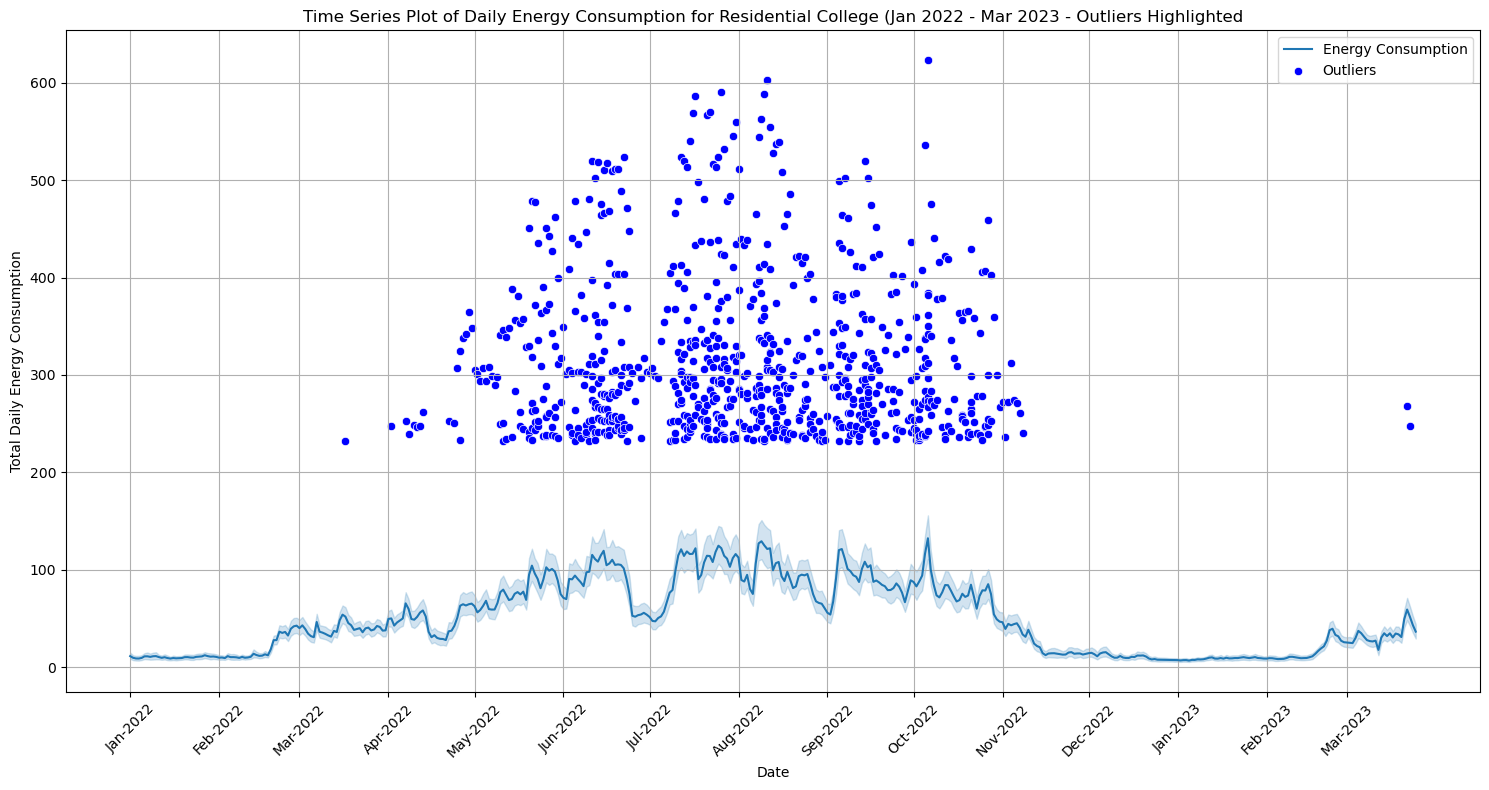

Energy Consumption Statistics for Residential College:
Mean: 49.557480881208576
Median: 29.71
Standard Deviation: 60.79404007572831
Upper Bound for Outliers: 231.9396011083935
Lower Bound for Outliers: -132.82463934597638
Unique Smart Meter IDs - Outliers Month Wise:
2022-03: ['0000200385DEF37']
2022-04: ['0000200385DEF37', '0000002393DEF8D']
2022-05: ['0000200385DEF37', '0000002393DEF8D', '0000100188DE6DF', '0000002395DEE02', '0000002399DED1C', '0000002355DE9ED', '0000003838DEBE8', '0000002413DE5C5']
2022-06: ['0000200385DEF37', '0000002393DEF8D', '0000002399DED1C', '0000002395DEE02', '0000002355DE9ED', '0000002413DE5C5', '0000100188DE6DF', '0000003838DEBE8', '0000002491DE00A', '0000003832DE979']
2022-07: ['0000200385DEF37', '0000002393DEF8D', '0000002395DEE02', '0000002355DE9ED', '0000002399DED1C', '0000100188DE6DF', '0000002413DE5C5', '0000003832DE979', '0000002491DE00A', '0000003838DEBE8', '0000003502DEB89', '0000003828DE145']
2022-08: ['0000002395DEE02', '0000100188DE6DF', '000000

In [ ]:
# Time Series Plot of Daily Energy Consumption for Residential College (Outliers Highlighted) (Jan 2022 - Mar 2023)


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)


# Filter for 'Residential College' entries and create a copy
residential_college_data = energy_data[energy_data['Flats Category'] == 'Residential College'].copy()

# Convert 'Date' column to datetime and sort data
residential_college_data['Date'] = pd.to_datetime(residential_college_data['Date'], dayfirst=True)
residential_college_data.sort_values('Date', inplace=True)

# Correcting the column name for total daily energy consumption
corrected_column_name = 'TotaldailyenergyConsumption'.strip()  # Removing any potential whitespace
if corrected_column_name not in residential_college_data.columns:
    # Find the correct column name
    for col in residential_college_data.columns:
        if 'TotaldailyenergyConsumption' in col:
            corrected_column_name = col
            break

# Calculate mean and standard deviation for outlier detection
mean_energy = residential_college_data[corrected_column_name].mean()
std_dev_energy = residential_college_data[corrected_column_name].std()

# Define upper and lower bounds for outliers
upper_bound = mean_energy + 3 * std_dev_energy
lower_bound = mean_energy - 3 * std_dev_energy

# Identifying outliers
residential_college_data['Outlier'] = ((residential_college_data[corrected_column_name] > upper_bound) |
                                      (residential_college_data[corrected_column_name] < lower_bound))

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(x='Date', y=corrected_column_name, data=residential_college_data, label='Energy Consumption')
sns.scatterplot(x='Date', y=corrected_column_name, data=residential_college_data[residential_college_data['Outlier']], color='blue', label='Outliers')

# Customizing the x-axis ticks
date_range_custom = pd.date_range(start='2022-01-01', end='2023-03-01', freq='MS')
plt.xticks(date_range_custom, [date.strftime('%b-%Y') for date in date_range_custom], rotation=45)

plt.title('Time Series Plot of Daily Energy Consumption for Residential College (Jan 2022 - Mar 2023 - Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Daily Energy Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Calculate statistics
mean_energy = residential_college_data[corrected_column_name].mean()
median_energy = residential_college_data[corrected_column_name].median()
std_dev_energy = residential_college_data[corrected_column_name].std()
upper_bound = mean_energy + 3 * std_dev_energy
lower_bound = mean_energy - 3 * std_dev_energy

# Displaying the statistics
print(f"Energy Consumption Statistics for Residential College:")
print(f"Mean: {mean_energy}")
print(f"Median: {median_energy}")
print(f"Standard Deviation: {std_dev_energy}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Lower Bound for Outliers: {lower_bound}")

# Calculate mean and standard deviation for outlier detection
mean_energy = residential_college_data[corrected_column_name].mean()
std_dev_energy = residential_college_data[corrected_column_name].std()

# Define upper and lower bounds for outliers
upper_bound = mean_energy + 3 * std_dev_energy
lower_bound = mean_energy - 3 * std_dev_energy

# Identifying outliers
residential_college_data['Outlier'] = ((residential_college_data[corrected_column_name] > upper_bound) |
                                      (residential_college_data[corrected_column_name] < lower_bound))

# Get a list of outliers month-wise with their Smart Meter Ids
outliers_data = residential_college_data[residential_college_data['Outlier']].copy()
outliers_data['Month'] = outliers_data['Date'].dt.to_period('M')
month_wise_outliers = outliers_data.groupby('Month')['Smart Meter Id'].unique()

# Display unique Smart Meter IDs - outliers month wise
print("Unique Smart Meter IDs - Outliers Month Wise:")
for month, smart_ids in month_wise_outliers.items():
    print(f"{month}: {smart_ids.tolist()}")


# OUTLIERS - Time Series Plot of Daily Energy Consumption for University Flats (Jan 2022 - Mar 2023)

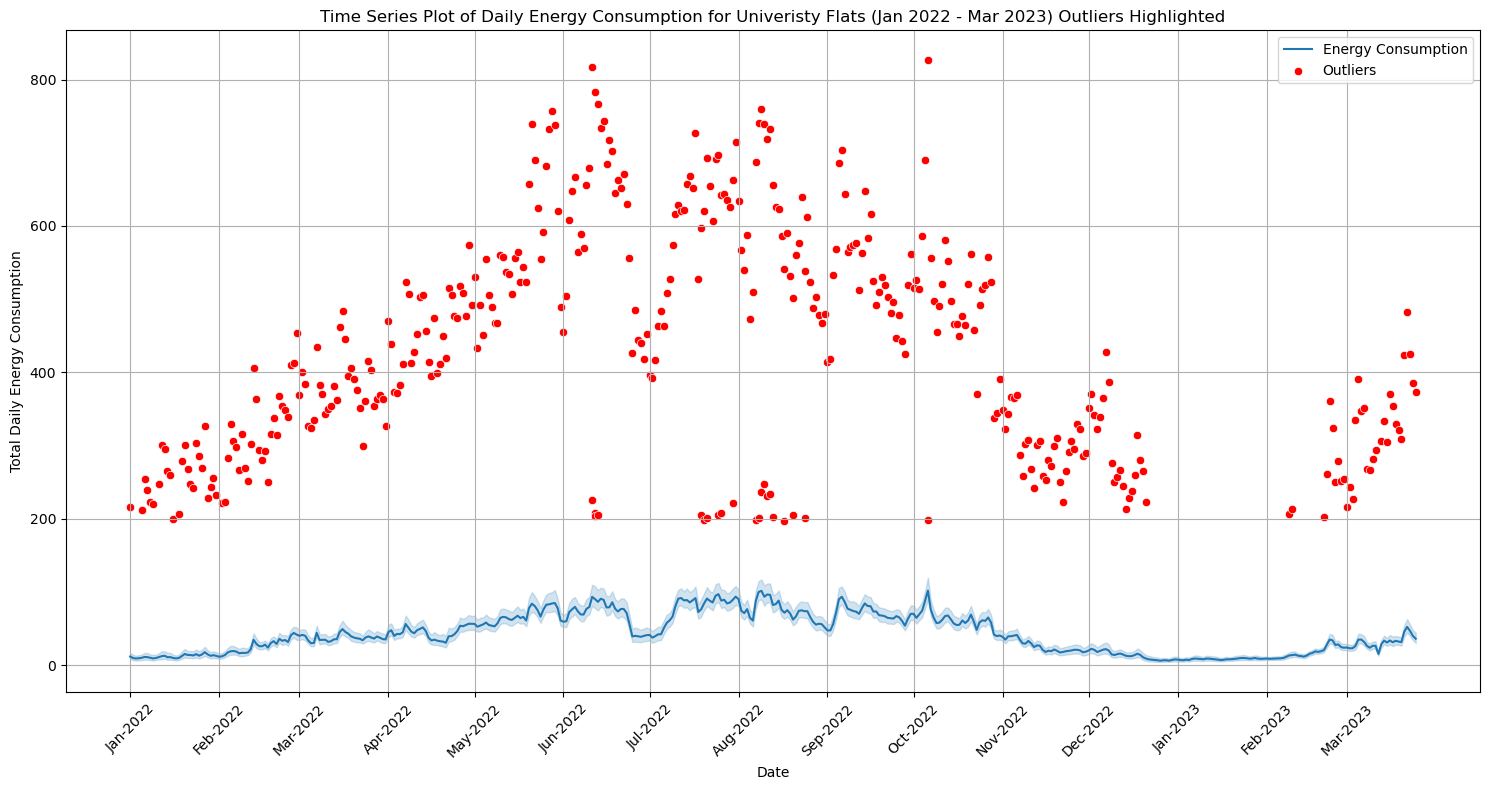

Energy Consumption Statistics for University Flats:
Mean: 42.556948570728025
Median: 31.84
Standard Deviation: 51.38237223439985
Upper Bound for Outliers: 196.7040652739276
Lower Bound for Outliers: -111.59016813247155
Unique Smart Meter IDs - Outliers Month Wise:
2022-01: ['0000002867DED9E']
2022-02: ['0000002867DED9E']
2022-03: ['0000002867DED9E']
2022-04: ['0000002867DED9E']
2022-05: ['0000002867DED9E']
2022-06: ['0000002867DED9E', '0000003274DE059', '0000003686DECCA']
2022-07: ['0000002867DED9E', '0000003274DE059']
2022-08: ['0000002867DED9E', '0000003274DE059']
2022-09: ['0000002867DED9E']
2022-10: ['0000002867DED9E', '0000003274DE059']
2022-11: ['0000002867DED9E']
2022-12: ['0000002867DED9E']
2023-02: ['0000002867DED9E']
2023-03: ['0000002867DED9E']


In [ ]:
# OUTLIERS - Time Series Plot of Daily Energy Consumption for University Flats (Jan 2022 - Mar 2023)


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Filter for University Flats entries and create a copy
Uni_flats_data = energy_data[energy_data['Flats Category'] == 'University Flats'].copy()

# Convert 'Date' column to datetime and sort data
Uni_flats_data['Date'] = pd.to_datetime(Uni_flats_data['Date'], dayfirst=True)
Uni_flats_data.sort_values('Date', inplace=True)

# Calculate mean and standard deviation for outlier detection
mean_energy = Uni_flats_data[corrected_column_name].mean()
std_dev_energy = Uni_flats_data[corrected_column_name].std()

# Define upper and lower bounds for outliers
upper_bound = mean_energy + 3 * std_dev_energy
lower_bound = mean_energy - 3 * std_dev_energy

# Identifying outliers
Uni_flats_data['Outlier'] = ((Uni_flats_data[corrected_column_name] > upper_bound) |
                                      (Uni_flats_data[corrected_column_name] < lower_bound))

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(x='Date', y=corrected_column_name, data=Uni_flats_data, label='Energy Consumption')
sns.scatterplot(x='Date', y=corrected_column_name, data=Uni_flats_data[Uni_flats_data['Outlier']], color='red', label='Outliers')

# Customizing the x-axis ticks
date_range_custom = pd.date_range(start='2022-01-01', end='2023-03-01', freq='MS')
plt.xticks(date_range_custom, [date.strftime('%b-%Y') for date in date_range_custom], rotation=45)

plt.title('Time Series Plot of Daily Energy Consumption for Univeristy Flats (Jan 2022 - Mar 2023) Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Daily Energy Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Calculate statistics
mean_energy = Uni_flats_data[corrected_column_name].mean()
median_energy = Uni_flats_data[corrected_column_name].median()
std_dev_energy = Uni_flats_data[corrected_column_name].std()
upper_bound = mean_energy + 3 * std_dev_energy
lower_bound = mean_energy - 3 * std_dev_energy

# Displaying the statistics
print(f"Energy Consumption Statistics for University Flats:")
print(f"Mean: {mean_energy}")
print(f"Median: {median_energy}")
print(f"Standard Deviation: {std_dev_energy}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Lower Bound for Outliers: {lower_bound}")

# Identifying outliers
Uni_flats_data['Outlier'] = ((Uni_flats_data[corrected_column_name] > upper_bound) |
                                      (Uni_flats_data[corrected_column_name] < lower_bound))

# Get a list of outliers month-wise with their Smart Meter Ids
outliers_data = Uni_flats_data[Uni_flats_data['Outlier']].copy()
outliers_data['Month'] = outliers_data['Date'].dt.to_period('M')
month_wise_outliers = outliers_data.groupby('Month')['Smart Meter Id'].unique()

# Display unique Smart Meter IDs - outliers month wise
print("Unique Smart Meter IDs - Outliers Month Wise:")
for month, smart_ids in month_wise_outliers.items():
    print(f"{month}: {smart_ids.tolist()}")

# Boxplot of Daily Energy Consumption for University Flats Street Wise (Smart meters Normalised)

Normalized Number of Smart Meter Outliers for Each Street:
Castle Street: No outliers detected.
Cumberland Street: 0.05714285714285714
Duke street: No outliers detected.
Dundas street: 0.09090909090909091
Forth street: No outliers detected.
Great King Street: No outliers detected.
Howe Street: No outliers detected.
Leith Street: No outliers detected.
Queen street: No outliers detected.
Saint David Street: No outliers detected.
Union street: No outliers detected.
Unique Smart Meter IDs as Outliers Category-wise:
University Flats: ['0000002867DED9E', '0000003274DE059', '0000003686DECCA']


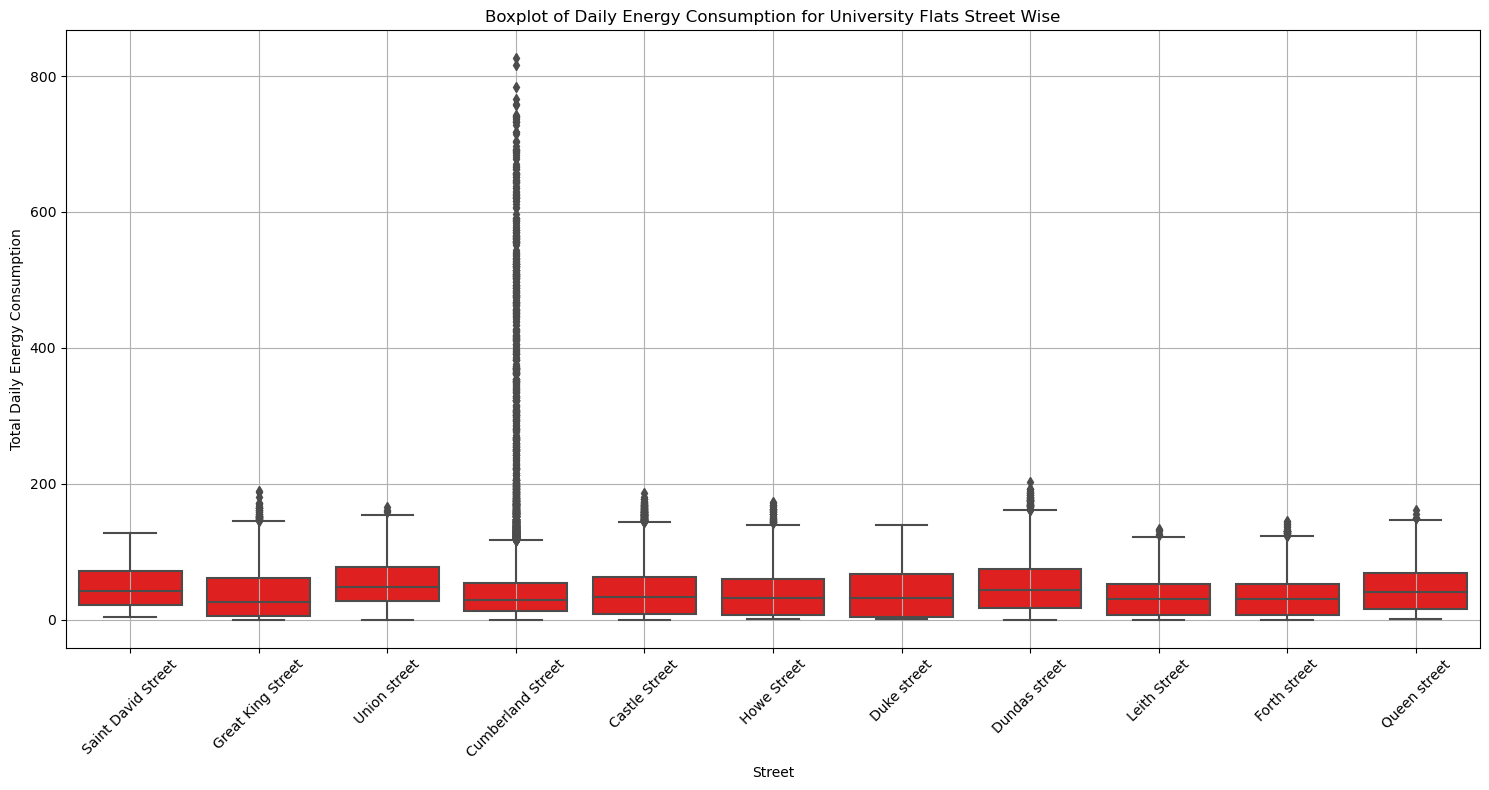

In [ ]:
# Boxplot of Daily Energy Consumption for University Flats Street Wise (Smart meters Normalised)


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)


# Filter for 'University Flats' entries
university_flats_data = energy_data[energy_data['Flats Category'] == 'University Flats'].copy()

# Corrected column name for total daily energy consumption
corrected_column_name = 'TotaldailyenergyConsumption'

# Calculate mean and standard deviation for outlier detection
mean_energy = university_flats_data[corrected_column_name].mean()
std_dev_energy = university_flats_data[corrected_column_name].std()

# Define upper and lower bounds for outliers
upper_bound = mean_energy + 3 * std_dev_energy
lower_bound = mean_energy - 3 * std_dev_energy

# Create a boxplot for daily energy consumption, street-wise
plt.figure(figsize=(15, 8))
sns.boxplot(x='Street', y=corrected_column_name, data=university_flats_data, color='red', whis=1.5)

plt.title('Boxplot of Daily Energy Consumption for University Flats Street Wise')
plt.xlabel('Street')
plt.ylabel('Total Daily Energy Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Function to calculate IQR
def calculate_iqr(series):
    return series.quantile(0.75) - series.quantile(0.25)

# Initializing a dictionary to hold statistical values for each street
street_stats = {}

# Iterating over each street to calculate statistics
for street in university_flats_data['Street'].unique():
    street_data = university_flats_data[university_flats_data['Street'] == street]
    street_energy = street_data[corrected_column_name]

    # Calculating statistics
    street_mean = street_energy.mean()
    street_median = street_energy.median()
    street_std = street_energy.std()
    street_iqr = calculate_iqr(street_energy)
    street_upper_bound = street_mean + 3 * street_std
    street_lower_bound = street_mean - 3 * street_std

    # Storing statistics in the dictionary
    street_stats[street] = {
        'Mean': street_mean,
        'Median': street_median,
        'Standard Deviation': street_std,
        'IQR': street_iqr,
        'Upper Bound (+3 SD)': street_upper_bound,
        'Lower Bound (-3 SD)': street_lower_bound
    }

# Calculate the total number of unique smart meters for each street
total_meters_by_street = university_flats_data.groupby('Street')['Smart Meter Id'].nunique()

# Identify outliers in the university flats data
university_flats_data['Outlier'] = ((university_flats_data[corrected_column_name] > upper_bound) |
                                    (university_flats_data[corrected_column_name] < lower_bound))

# Group data by 'Street' and get the count of unique Smart Meter IDs for outliers
outliers_by_street = university_flats_data[university_flats_data['Outlier']].groupby('Street')['Smart Meter Id'].nunique()

# Normalize the number of outliers by the total number of smart meters
normalized_outliers = outliers_by_street / total_meters_by_street

# Print the normalized number of smart meter outliers for each street
print("Normalized Number of Smart Meter Outliers for Each Street:")
for street, normalized_count in normalized_outliers.items():
    total_meters = total_meters_by_street.get(street, 0)
    outlier_count = outliers_by_street.get(street, 0)

    if total_meters == 0:
        print(f"{street}: No smart meters recorded.")
    elif outlier_count == 0:
        print(f"{street}: No outliers detected.")
    else:
        print(f"{street}: {normalized_count}")

# Identify unique smart meter IDs as outliers category-wise
outlier_ids_by_category = university_flats_data[university_flats_data['Outlier']].groupby('Flats Category')['Smart Meter Id'].unique()

# Print unique smart meter IDs as outliers for each category
print("Unique Smart Meter IDs as Outliers Category-wise:")
for category, smart_ids in outlier_ids_by_category.items():
    print(f"{category}: {smart_ids.tolist()}")

# Show the boxplot
plt.show()


# Boxplot of Daily Energy Consumption for Residential College - Street Wise

Normalized Number of Smart Meter Outliers for Each Street:
Castle Street: No outliers detected.
Clyde street: 0.125
Cumberland Street: 0.5
Dundas street: 0.15384615384615385
Forth street: No outliers detected.
Gladstone road: No outliers detected.
Heriot Row: 0.3333333333333333
Leith Street: No outliers detected.
Park Street: 0.5
Queen street: 0.2
Regent Road: No outliers detected.
Saint David Street: 0.5
Unique Smart Meter IDs as Outliers Category-wise:
Residential College: ['0000002355DE9ED', '0000002393DEF8D', '0000002395DEE02', '0000002399DED1C', '0000002413DE5C5', '0000002491DE00A', '0000003502DEB89', '0000003828DE145', '0000003832DE979', '0000003838DEBE8', '0000003898DE3F7', '0000100188DE6DF', '0000200385DEF37', '0000201778DEDDA']


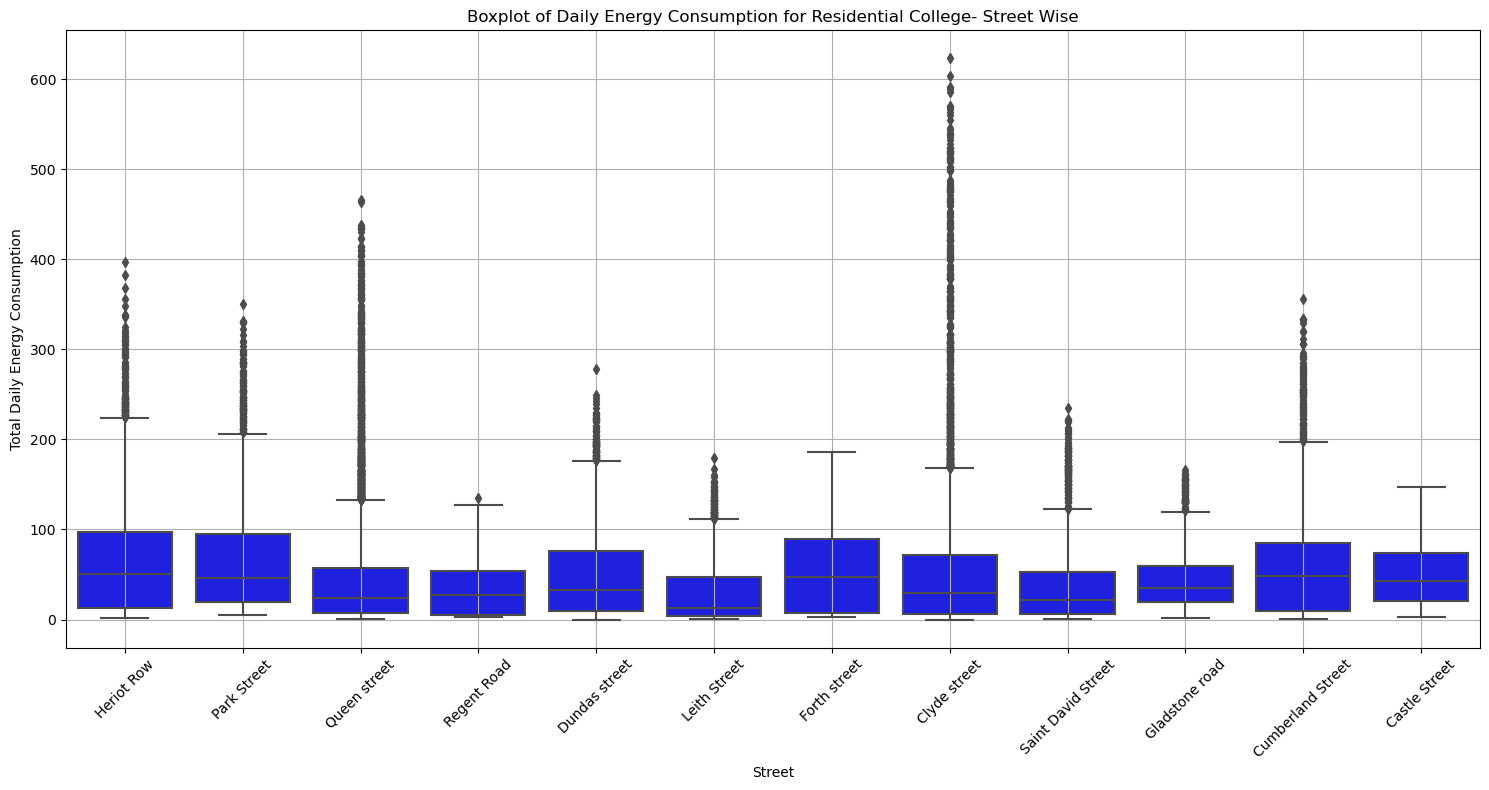

In [ ]:
# Boxplot of Daily Energy Consumption for Residential College Street Wise (Smart meters Normalised)


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)


# Filter for 'Residential College' entries
university_flats_data = energy_data[energy_data['Flats Category'] == 'Residential College'].copy()

# Corrected column name for total daily energy consumption
corrected_column_name = 'TotaldailyenergyConsumption'

# Calculate mean and standard deviation for outlier detection
mean_energy = university_flats_data[corrected_column_name].mean()
std_dev_energy = university_flats_data[corrected_column_name].std()

# Define upper and lower bounds for outliers
upper_bound = mean_energy + 3 * std_dev_energy
lower_bound = mean_energy - 3 * std_dev_energy

# Create a boxplot for daily energy consumption, street-wise
plt.figure(figsize=(15, 8))
sns.boxplot(x='Street', y=corrected_column_name, data=university_flats_data, color='blue', whis=1.5)

plt.title('Boxplot of Daily Energy Consumption for Residential College- Street Wise')
plt.xlabel('Street')
plt.ylabel('Total Daily Energy Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Function to calculate IQR
def calculate_iqr(series):
    return series.quantile(0.75) - series.quantile(0.25)

# Initializing a dictionary to hold statistical values for each street
street_stats = {}

# Iterating over each street to calculate statistics
for street in university_flats_data['Street'].unique():
    street_data = university_flats_data[university_flats_data['Street'] == street]
    street_energy = street_data[corrected_column_name]

    # Calculating statistics
    street_mean = street_energy.mean()
    street_median = street_energy.median()
    street_std = street_energy.std()
    street_iqr = calculate_iqr(street_energy)
    street_upper_bound = street_mean + 3 * street_std
    street_lower_bound = street_mean - 3 * street_std

    # Storing statistics in the dictionary
    street_stats[street] = {
        'Mean': street_mean,
        'Median': street_median,
        'Standard Deviation': street_std,
        'IQR': street_iqr,
        'Upper Bound (+3 SD)': street_upper_bound,
        'Lower Bound (-3 SD)': street_lower_bound
    }

# Calculate the total number of unique smart meters for each street
total_meters_by_street = university_flats_data.groupby('Street')['Smart Meter Id'].nunique()

# Identify outliers in the university flats data
university_flats_data['Outlier'] = ((university_flats_data[corrected_column_name] > upper_bound) |
                                    (university_flats_data[corrected_column_name] < lower_bound))

# Group data by 'Street' and get the count of unique Smart Meter IDs for outliers
outliers_by_street = university_flats_data[university_flats_data['Outlier']].groupby('Street')['Smart Meter Id'].nunique()

# Normalize the number of outliers by the total number of smart meters
normalized_outliers = outliers_by_street / total_meters_by_street

# Print the normalized number of smart meter outliers for each street
print("Normalized Number of Smart Meter Outliers for Each Street:")
for street, normalized_count in normalized_outliers.items():
    total_meters = total_meters_by_street.get(street, 0)
    outlier_count = outliers_by_street.get(street, 0)

    if total_meters == 0:
        print(f"{street}: No smart meters recorded.")
    elif outlier_count == 0:
        print(f"{street}: No outliers detected.")
    else:
        print(f"{street}: {normalized_count}")

# Identify unique smart meter IDs as outliers category-wise
outlier_ids_by_category = university_flats_data[university_flats_data['Outlier']].groupby('Flats Category')['Smart Meter Id'].unique()

# Print unique smart meter IDs as outliers for each category
print("Unique Smart Meter IDs as Outliers Category-wise:")
for category, smart_ids in outlier_ids_by_category.items():
    print(f"{category}: {smart_ids.tolist()}")

# Show the boxplot
plt.show()


# Boxplot of Daily Energy Consumption for Residential College Category Building Code Wise

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


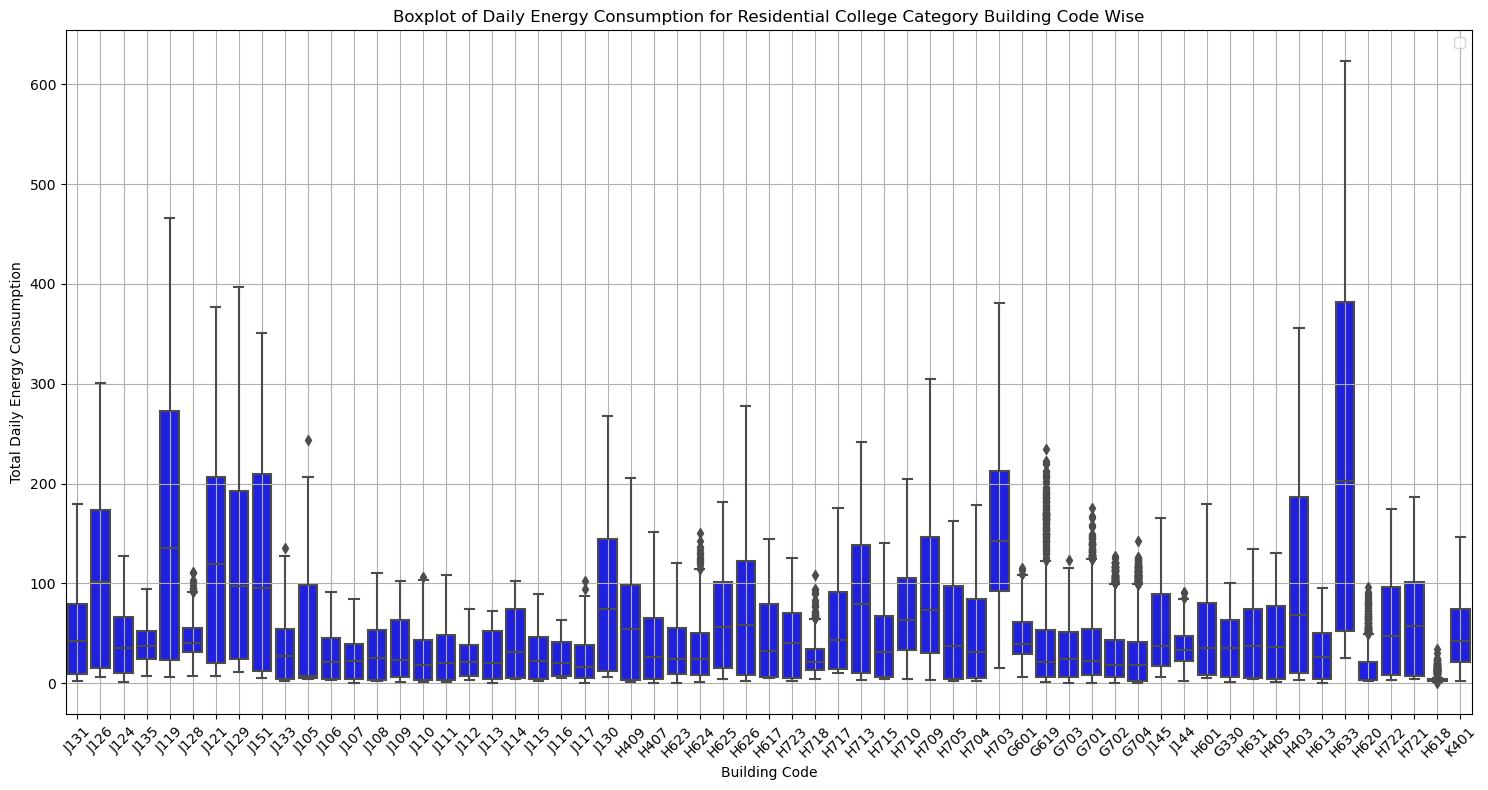

Statistics for Building Code J131:
Mean: 49.58
Median: 42.39
Standard Deviation: 39.79
IQR: 70.42
+3 SD: 168.95
-3 SD: -69.79

Statistics for Building Code J126:
Mean: 105.25
Median: 101.25
Standard Deviation: 79.18
IQR: 158.48
+3 SD: 342.78
-3 SD: -132.28

Statistics for Building Code J124:
Mean: 41.14
Median: 34.94
Standard Deviation: 30.79
IQR: 56.86
+3 SD: 133.50
-3 SD: -51.23

Statistics for Building Code J135:
Mean: 39.48
Median: 37.01
Standard Deviation: 19.07
IQR: 28.22
+3 SD: 96.69
-3 SD: -17.73

Statistics for Building Code J119:
Mean: 160.90
Median: 135.57
Standard Deviation: 130.91
IQR: 249.13
+3 SD: 553.63
-3 SD: -231.83

Statistics for Building Code J128:
Mean: 43.82
Median: 40.34
Standard Deviation: 20.25
IQR: 24.19
+3 SD: 104.57
-3 SD: -16.93

Statistics for Building Code J121:
Mean: 129.19
Median: 119.71
Standard Deviation: 101.41
IQR: 186.07
+3 SD: 433.43
-3 SD: -175.04

Statistics for Building Code J129:
Mean: 117.27
Median: 97.78
Standard Deviation: 95.95
IQR: 168.2

NameError: name 'data' is not defined

In [ ]:
# Boxplot of Daily Energy Consumption for Residential College Category Building Code Wise


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)


# Filter for 'Residential College' entries
residential_college_data = energy_data[energy_data['Flats Category'] == 'Residential College'].copy()

# Use the column name exactly as it appears, including the leading and trailing spaces
corrected_column_name = 'TotaldailyenergyConsumption'

# Calculate mean and standard deviation for outlier detection
mean_energy = residential_college_data[corrected_column_name].mean()
std_dev_energy = residential_college_data[corrected_column_name].std()

# Define upper and lower bounds for outliers using 3 standard deviations
upper_bound = mean_energy + 3 * std_dev_energy
lower_bound = mean_energy - 3 * std_dev_energy

# Create a boxplot for daily energy consumption, building code wise
plt.figure(figsize=(15, 8))
sns.boxplot(x='Building Code', y=corrected_column_name, data=residential_college_data, color='blue', whis=1.5)
plt.title('Boxplot of Daily Energy Consumption for Residential College Category Building Code Wise')
plt.xlabel('Building Code')
plt.ylabel('Total Daily Energy Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

######################################

# Calculate mean and standard deviation for outlier detection
mean_energy = residential_college_data[corrected_column_name].mean()
std_dev_energy = residential_college_data[corrected_column_name].std()

# Calculate and print statistics values for each building code
building_code_stats = {}

# Iterating over each building code to calculate statistics
for code in residential_college_data['Building Code'].unique():
    code_data = residential_college_data[residential_college_data['Building Code'] == code]
    energy_data = code_data[corrected_column_name]

    # Calculating statistics
    code_mean = energy_data.mean()
    code_median = energy_data.median()
    code_std = energy_data.std()
    code_iqr = energy_data.quantile(0.75) - energy_data.quantile(0.25)

    # Storing statistics in the dictionary
    building_code_stats[code] = {
        'Mean': code_mean,
        'Median': code_median,
        'Standard Deviation': code_std,
        'IQR': code_iqr,
        '+3 SD': code_mean + 3 * code_std,
        '-3 SD': code_mean - 3 * code_std
    }

# Displaying the statistics for each building code
for code, stats in building_code_stats.items():
    print(f"Statistics for Building Code {code}:")
    for stat_name, value in stats.items():
        print(f"{stat_name}: {value:.2f}")
    print()  # Blank line for readability between building codes

################################

# Filter for 'Residential College' entries
residential_college_data = data[data['Flats Category'] == 'Residential College'].copy()

# Use the correct column name
energy_column_name = 'TotaldailyenergyConsumption'
# Calculate mean and standard deviation for outlier detection
mean_energy = residential_college_data[energy_column_name].mean()
std_dev_energy = residential_college_data[energy_column_name].std()

# Define upper and lower bounds for outliers using 3 standard deviations
upper_bound = mean_energy + 3 * std_dev_energy
lower_bound = mean_energy - 3 * std_dev_energy

    # Identify outliers
outliers = residential_college_data[(residential_college_data[energy_column_name] > upper_bound) |
                                    (residential_college_data[energy_column_name] < lower_bound)]

# Group by Building Code and print unique Smart Meter IDs for each group
for code in outliers['Building Code'].unique():
    unique_ids = outliers[outliers['Building Code'] == code]['Smart Meter Id'].unique()
    print(f"Building Code: {code}")
    print("Outlier Smart Meter IDs:")
    for id in unique_ids:
        print(id)
    print()  # Blank line for readability


# The box plots for energy consumption by time of day for University Flats, street-wise ( Normalised Data - smart Meter count across street)


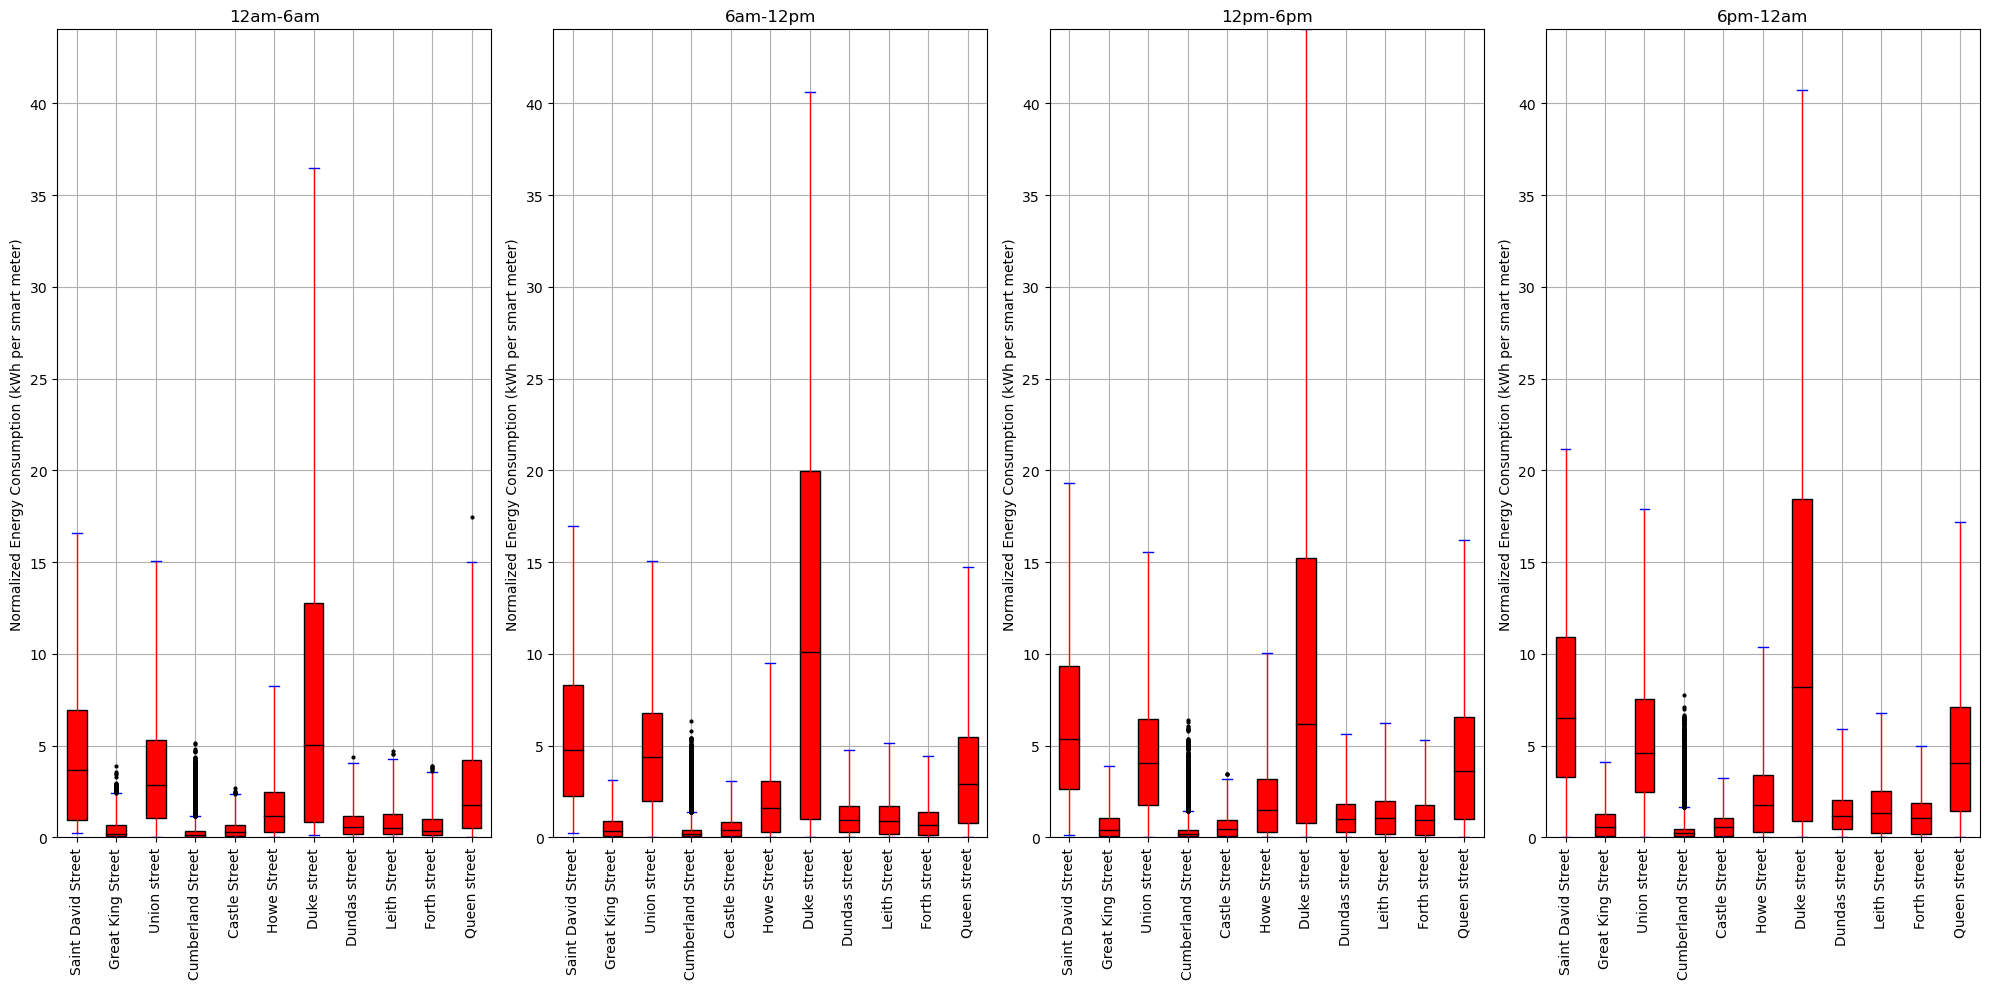

{'12am-6am': [['0000002795DE203', 'Saint David Street'],
  ['0000002803DE364', 'Saint David Street'],
  ['0000002858DE5B8', 'Union street'],
  ['0000002859DE9FD', 'Union street'],
  ['0000003263DE73E', 'Howe Street'],
  ['0000003415DE5EA', 'Duke street'],
  ['0000003447DED67', 'Howe Street'],
  ['0000003984DE340', 'Union street'],
  ['0000204886DE679', 'Queen street'],
  ['0000204888DE5E2', 'Queen street'],
  ['0000205445DE0FA', 'Queen street']],
 '6am-12pm': [['0000002795DE203', 'Saint David Street'],
  ['0000002803DE364', 'Saint David Street'],
  ['0000002858DE5B8', 'Union street'],
  ['0000002859DE9FD', 'Union street'],
  ['0000003263DE73E', 'Howe Street'],
  ['0000003415DE5EA', 'Duke street'],
  ['0000003447DED67', 'Howe Street'],
  ['0000003984DE340', 'Union street'],
  ['0000204886DE679', 'Queen street'],
  ['0000204888DE5E2', 'Queen street'],
  ['0000205445DE0FA', 'Queen street']],
 '12pm-6pm': [['0000002795DE203', 'Saint David Street'],
  ['0000002803DE364', 'Saint David Street

In [ ]:
#The box plots for energy consumption by time of day for University Flats, street-wiseimport pandas as pd


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)


# Filter data for University Flats
uni_flats = energy_data[energy_data['Flats Category'] == 'University Flats'].copy()

# Count the number of unique smart meters for each street
smart_meter_counts = uni_flats.groupby('Street')['Smart Meter Id'].nunique()

# Define the time ranges as columns with the correct column names (including spaces and AM/PM)
time_ranges = {
    '12am-6am': ['12.00 AM', '1.00 AM', '2.00 AM', '3.00 AM', '4.00 AM', '5.00 AM'],
    '6am-12pm': ['6.00 AM', '7.00 AM', '8.00 AM', '9.00 AM', '10.00 AM', '11.00 AM'],
    '12pm-6pm': ['12.00 PM', '1.00 PM', '2.00 PM', '3.00 PM', '4.00 PM', '5.00 PM'],
    '6pm-12am': ['6.00 PM', '7.00 PM', '8.00 PM', '9.00 PM', '10.00 PM', '11.00 PM']
}

# Aggregating and normalizing data into the defined time ranges
for time_range, hours in time_ranges.items():
    uni_flats[time_range] = uni_flats[hours].sum(axis=1)
    for street, count in smart_meter_counts.items():
        street_filter = uni_flats['Street'] == street
        uni_flats.loc[street_filter, time_range] /= count

# Add a step to calculate and identify outliers using +- 3SD
for time_range in time_ranges.keys():
    mean_value = uni_flats[time_range].mean()
    std_dev = uni_flats[time_range].std()
    lower_bound = mean_value - 3 * std_dev
    upper_bound = mean_value + 3 * std_dev
    uni_flats[f'{time_range}_outliers'] = uni_flats[time_range].apply(lambda x: x < lower_bound or x > upper_bound)

# Define the flier properties for smaller dot size
flierprops = dict(marker='o', markerfacecolor='black', markersize=2, linestyle='none')

# Find global min and max for setting y-axis limits
global_min = min(uni_flats[list(time_ranges.keys())].min())
global_max = max(uni_flats[list(time_ranges.keys())].max())

# Plotting the box plots for these time ranges street-wise
plt.figure(figsize=(20, 10))

# Create a box plot for each time range
for i, time_range in enumerate(time_ranges.keys(), 1):
    plt.subplot(1, 4, i)  # 4 subplots for 4 time ranges

    # Get normalized data for all streets in the current time range
    street_data = [uni_flats[uni_flats['Street'] == street][time_range].dropna() for street in uni_flats['Street'].unique()]

    # Create the box plot
    plt.boxplot(street_data, patch_artist=True, boxprops=dict(facecolor='red'), whiskerprops=dict(color='red'), capprops=dict(color='blue'), medianprops=dict(color='black'), flierprops=flierprops, whis=3)

    plt.title(time_range)
    plt.xticks(range(1, len(uni_flats['Street'].unique()) + 1), uni_flats['Street'].unique(), rotation=90)
    plt.ylabel('Normalized Energy Consumption (kWh per smart meter)')
    plt.ylim(global_min, global_max)  # Set the y-axis limits
    plt.grid(True)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

###########################################################

# Identifying outliers using +- 3SD for each time range and including street names
outliers_info = {}
for time_range in time_ranges.keys():
    mean_value = uni_flats[time_range].mean()
    std_dev = uni_flats[time_range].std()
    lower_bound = mean_value - 3 * std_dev
    upper_bound = mean_value + 3 * std_dev

    # Identifying the smart meter IDs and their respective streets that are outliers in this time range
    outliers = uni_flats[(uni_flats[time_range] < lower_bound) | (uni_flats[time_range] > upper_bound)]
    outliers_info[time_range] = outliers[['Smart Meter Id', 'Street']].drop_duplicates().values.tolist()

outliers_info

In [ ]:
######################################################

# Calculating statistics for each time range and street for the above plot  - Univeristy Flats - Different Time Zone wise
street_wise_stats = {}
for street in uni_flats['Street'].unique():
    street_wise_stats[street] = {}
    for time_range in time_ranges.keys():
        street_data = uni_flats[uni_flats['Street'] == street]
        street_wise_stats[street][time_range] = street_data[time_range].describe()

street_wise_stats

{'Saint David Street': {'12am-6am': count    898.000000
  mean       4.576581
  std        3.735074
  min        0.255000
  25%        0.957500
  50%        3.670000
  75%        6.916250
  max       16.575000
  Name: 12am-6am, dtype: float64,
  '6am-12pm': count    898.000000
  mean       5.504332
  std        3.861149
  min        0.250000
  25%        2.267500
  50%        4.745000
  75%        8.287500
  max       16.990000
  Name: 6am-12pm, dtype: float64,
  '12pm-6pm': count    898.000000
  mean       6.194777
  std        4.349310
  min        0.145000
  25%        2.621250
  50%        5.387500
  75%        9.327500
  max       19.310000
  Name: 12pm-6pm, dtype: float64,
  '6pm-12am': count    898.000000
  mean       7.293307
  std        4.934171
  min        0.000000
  25%        3.265000
  50%        6.517500
  75%       10.933750
  max       21.160000
  Name: 6pm-12am, dtype: float64},
 'Great King Street': {'12am-6am': count    6735.000000
  mean        0.457155
  std     

# The box plots for energy consumption by time of day for Residential College, street-wise ( Normalised Data - Smart Meter Count)

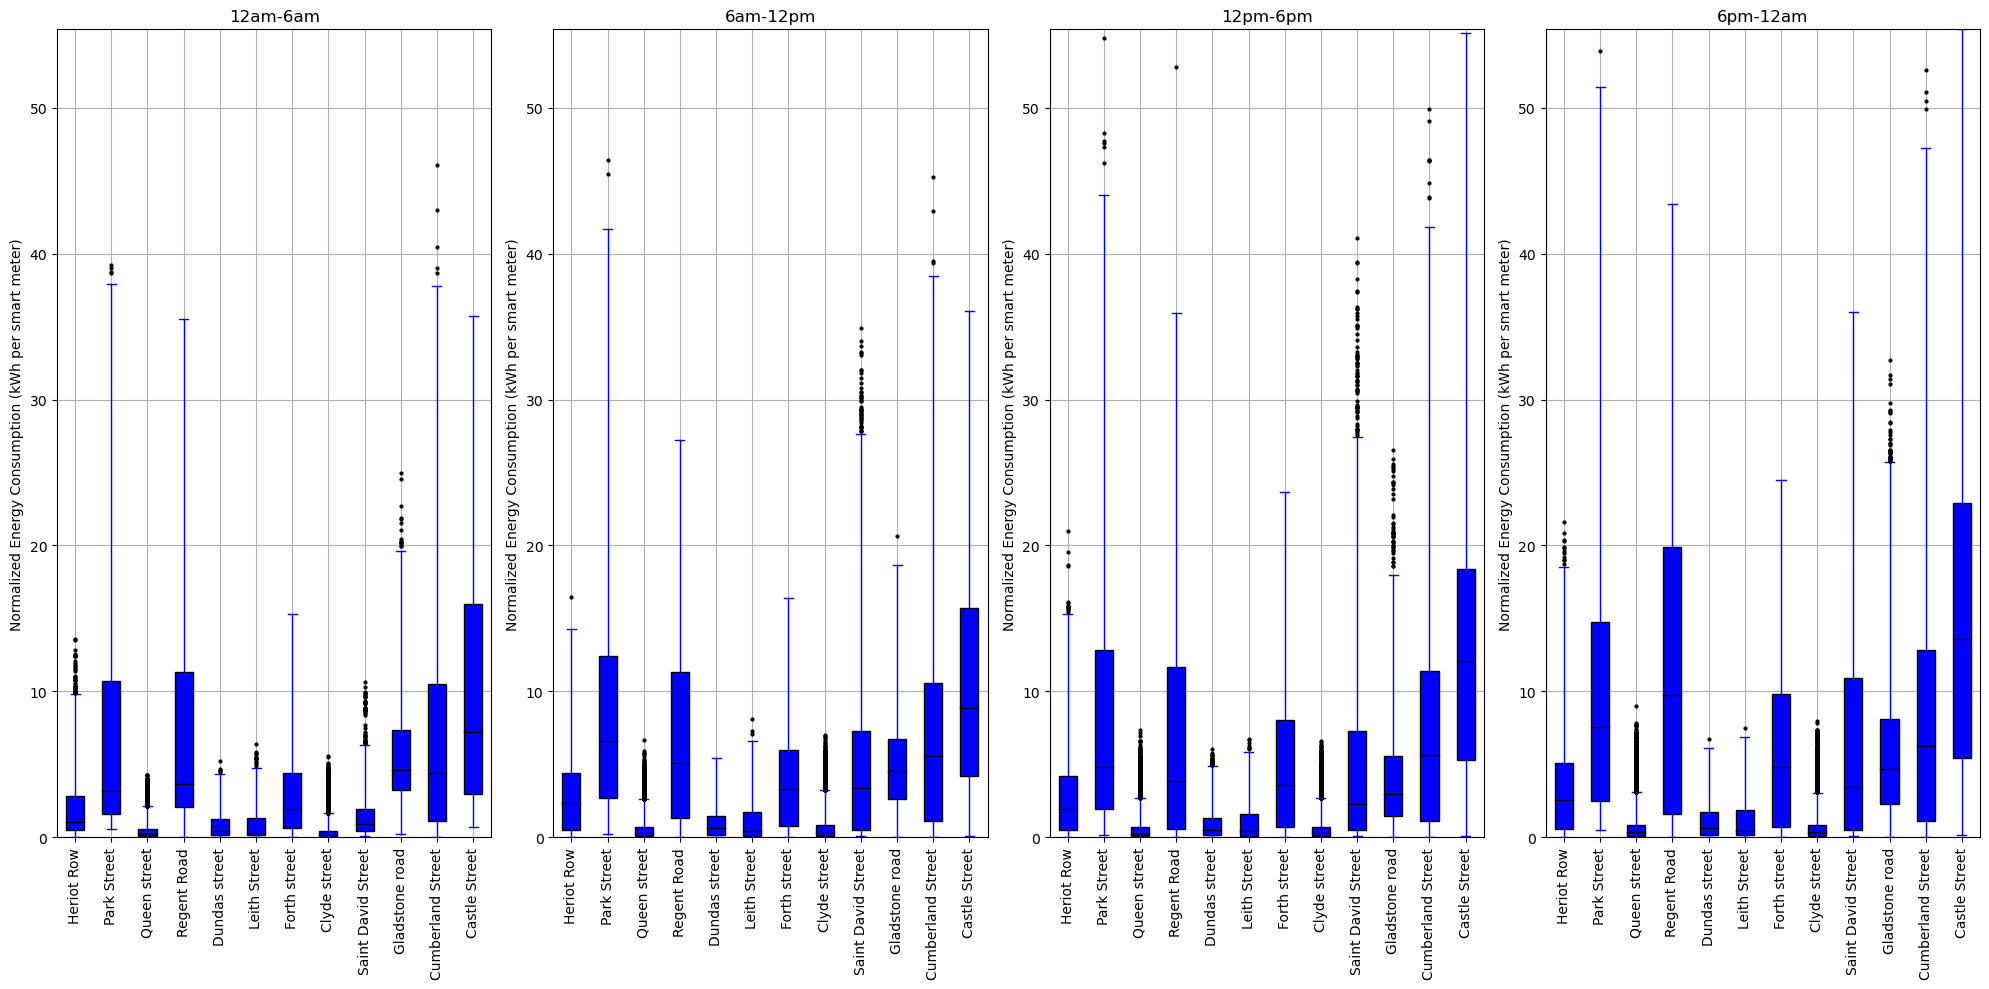

{'12am-6am': [['0000002399DED1C', 'Heriot Row'],
  ['0000002413DE5C5', 'Park Street'],
  ['0000002418DEB11', 'Regent Road'],
  ['0000009259DEC17', 'Gladstone road'],
  ['0000100003DE445', 'Cumberland Street'],
  ['0000100188DE6DF', 'Cumberland Street'],
  ['0000200913DEB55', 'Forth street'],
  ['0000505443DE47E', 'Castle Street']],
 '6am-12pm': [['0000002355DE9ED', 'Heriot Row'],
  ['0000002357DE968', 'Park Street'],
  ['0000002399DED1C', 'Heriot Row'],
  ['0000002413DE5C5', 'Park Street'],
  ['0000002418DEB11', 'Regent Road'],
  ['0000003898DE3F7', 'Saint David Street'],
  ['0000009259DEC17', 'Gladstone road'],
  ['0000100003DE445', 'Cumberland Street'],
  ['0000100188DE6DF', 'Cumberland Street'],
  ['0000201147DE3FA', 'Forth street'],
  ['0000505443DE47E', 'Castle Street']],
 '12pm-6pm': [['0000002357DE968', 'Park Street'],
  ['0000002399DED1C', 'Heriot Row'],
  ['0000002413DE5C5', 'Park Street'],
  ['0000002418DEB11', 'Regent Road'],
  ['0000003898DE3F7', 'Saint David Street'],
  ['

In [ ]:
#The box plots for energy consumption by time of day for Residential College, street-wiseimport pandas as pd


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)


# Filter data for University Flats
uni_flats = energy_data[energy_data['Flats Category'] == 'Residential College'].copy()

# Count the number of unique smart meters for each street
smart_meter_counts = uni_flats.groupby('Street')['Smart Meter Id'].nunique()

# Define the time ranges as columns with the correct column names (including spaces and AM/PM)
time_ranges = {
    '12am-6am': ['12.00 AM', '1.00 AM', '2.00 AM', '3.00 AM', '4.00 AM', '5.00 AM'],
    '6am-12pm': ['6.00 AM', '7.00 AM', '8.00 AM', '9.00 AM', '10.00 AM', '11.00 AM'],
    '12pm-6pm': ['12.00 PM', '1.00 PM', '2.00 PM', '3.00 PM', '4.00 PM', '5.00 PM'],
    '6pm-12am': ['6.00 PM', '7.00 PM', '8.00 PM', '9.00 PM', '10.00 PM', '11.00 PM']
}

# Aggregating and normalizing data into the defined time ranges
for time_range, hours in time_ranges.items():
    uni_flats[time_range] = uni_flats[hours].sum(axis=1)
    for street, count in smart_meter_counts.items():
        street_filter = uni_flats['Street'] == street
        uni_flats.loc[street_filter, time_range] /= count

# Add a step to calculate and identify outliers using +- 3SD
for time_range in time_ranges.keys():
    mean_value = uni_flats[time_range].mean()
    std_dev = uni_flats[time_range].std()
    lower_bound = mean_value - 3 * std_dev
    upper_bound = mean_value + 3 * std_dev
    uni_flats[f'{time_range}_outliers'] = uni_flats[time_range].apply(lambda x: x < lower_bound or x > upper_bound)

# Define the flier properties for smaller dot size
flierprops = dict(marker='o', markerfacecolor='black', markersize=2, linestyle='none')

# Find global min and max for setting y-axis limits
global_min = min(uni_flats[list(time_ranges.keys())].min())
global_max = max(uni_flats[list(time_ranges.keys())].max())

# Plotting the box plots for these time ranges street-wise
plt.figure(figsize=(20, 10))

# Create a box plot for each time range
for i, time_range in enumerate(time_ranges.keys(), 1):
    plt.subplot(1, 4, i)  # 4 subplots for 4 time ranges

    # Get normalized data for all streets in the current time range
    street_data = [uni_flats[uni_flats['Street'] == street][time_range].dropna() for street in uni_flats['Street'].unique()]

    # Create the box plot
    plt.boxplot(street_data, patch_artist=True, boxprops=dict(facecolor='blue'), whiskerprops=dict(color='blue'), capprops=dict(color='blue'), medianprops=dict(color='black'), flierprops=flierprops, whis=3)

    plt.title(time_range)
    plt.xticks(range(1, len(uni_flats['Street'].unique()) + 1), uni_flats['Street'].unique(), rotation=90)
    plt.ylabel('Normalized Energy Consumption (kWh per smart meter)')
    plt.ylim(global_min, global_max)  # Set the y-axis limits
    plt.grid(True)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

###########################################################

# Identifying outliers using +- 3SD for each time range and including street names
outliers_info = {}
for time_range in time_ranges.keys():
    mean_value = uni_flats[time_range].mean()
    std_dev = uni_flats[time_range].std()
    lower_bound = mean_value - 3 * std_dev
    upper_bound = mean_value + 3 * std_dev

    # Identifying the smart meter IDs and their respective streets that are outliers in this time range
    outliers = uni_flats[(uni_flats[time_range] < lower_bound) | (uni_flats[time_range] > upper_bound)]
    outliers_info[time_range] = outliers[['Smart Meter Id', 'Street']].drop_duplicates().values.tolist()

outliers_info

# BOX PLOT comparing average hourly energy consumption on weekdays versus weekends

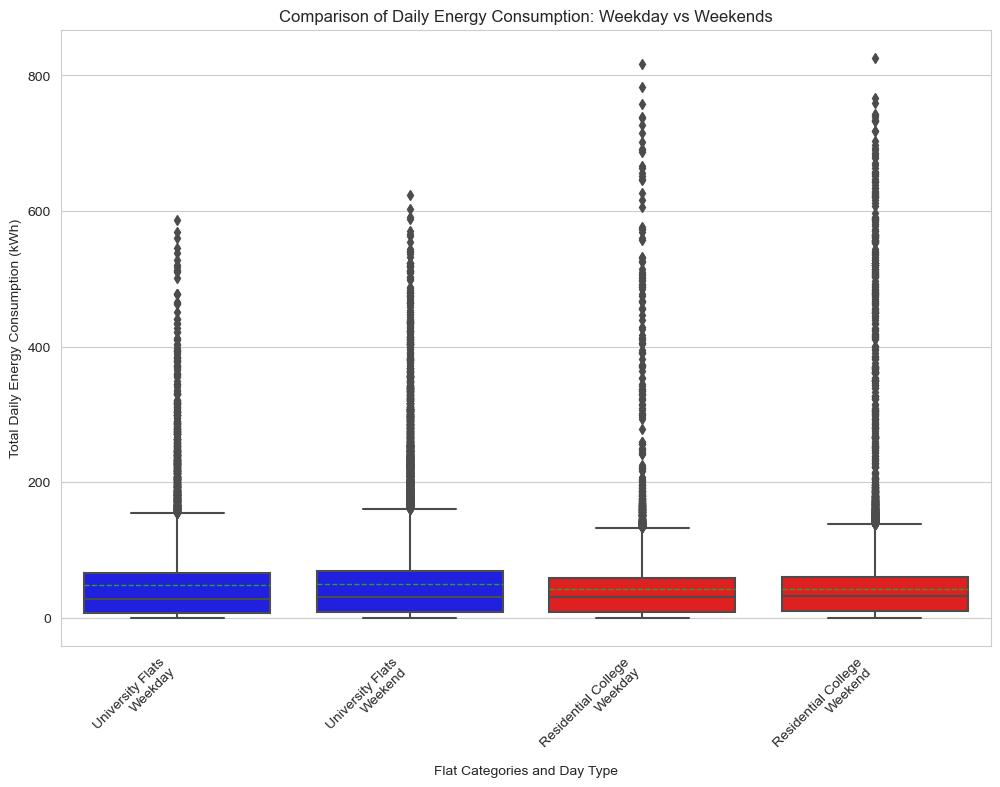

                                    mean        std
CategoryDayType                                    
Residential College - Weekday  50.193375  61.220112
Residential College - Weekend  47.980070  59.697589
University Flats - Weekday     42.863011  51.459451
University Flats - Weekend     41.797723  51.184593
                                    mean        std  lower_bound  upper_bound
CategoryDayType                                                              
Residential College - Weekday  50.193375  61.220112  -133.466962   233.853711
Residential College - Weekend  47.980070  59.697589  -131.112697   227.072837
University Flats - Weekday     42.863011  51.459451  -111.515342   197.241364
University Flats - Weekend     41.797723  51.184593  -111.756056   195.351503
Outliers (Smart Meter Ids):
Residential College - Weekday: ['0000002355DE9ED' '0000002393DEF8D' '0000002395DEE02' '0000002399DED1C'
 '0000002413DE5C5' '0000002491DE00A' '0000003502DEB89' '0000003828DE145'
 '0000003832DE9

In [ ]:
# BOX PLOT comparing average hourly energy consumption on weekdays versus weekends


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Convert 'Date' column to datetime and extract day of the week
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
energy_data['DayOfWeek'] = energy_data['Date'].dt.day_name()

# Classify as Weekend or Weekday
energy_data['DayType'] = energy_data['DayOfWeek'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Create a new column 'CategoryDayType' combining 'Flats Category' and 'DayType'
energy_data['CategoryDayType'] = energy_data['Flats Category'] + ' - ' + energy_data['DayType']

# Filter the data for the required columns
plot_data = energy_data[['CategoryDayType', 'TotaldailyenergyConsumption', 'Smart Meter Id']]

# Group the data to calculate statistics and outliers
grouped_data = plot_data.groupby('CategoryDayType')
statistics = grouped_data['TotaldailyenergyConsumption'].agg(['mean', 'std'])

# Calculate outliers threshold (+- 3SD)
outliers_threshold = statistics.copy()
outliers_threshold['lower_bound'] = statistics['mean'] - 3 * statistics['std']
outliers_threshold['upper_bound'] = statistics['mean'] + 3 * statistics['std']

# Identify outliers based on 3SD
outliers = {}
for category in outliers_threshold.index:
    category_data = plot_data[plot_data['CategoryDayType'] == category]
    threshold = outliers_threshold.loc[category]
    outlier_condition = ((category_data['TotaldailyenergyConsumption'] < threshold['lower_bound']) |
                         (category_data['TotaldailyenergyConsumption'] > threshold['upper_bound']))
    outliers[category] = category_data[outlier_condition]['Smart Meter Id'].unique()

# Creating the box plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

ax = sns.boxplot(x='CategoryDayType', y='TotaldailyenergyConsumption', data=plot_data,
                 palette={'University Flats - Weekday':'red', 'University Flats - Weekend':'red',
                          'Residential College - Weekday':'blue', 'Residential College - Weekend':'blue'},
                 showfliers=True, showmeans=True, meanline=True, whis=1.5)

# Setting labels and titles
ax.set_title('Comparison of Daily Energy Consumption: Weekday vs Weekends')
ax.set_xlabel('Flat Categories and Day Type')
ax.set_ylabel('Total Daily Energy Consumption (kWh)')

# Customize x-axis labels with two lines
labels = ['University Flats\nWeekday', 'University Flats\nWeekend',
          'Residential College\nWeekday', 'Residential College\nWeekend']
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.show()

# Display the statistics, outliers threshold, and outliers Smart Meter Ids
print(statistics)
print(outliers_threshold)
print("Outliers (Smart Meter Ids):")
for category, ids in outliers.items():
    print(f"{category}: {ids}")


# heatmap visualization comparing average hourly energy consumption on weekdays versus weekends

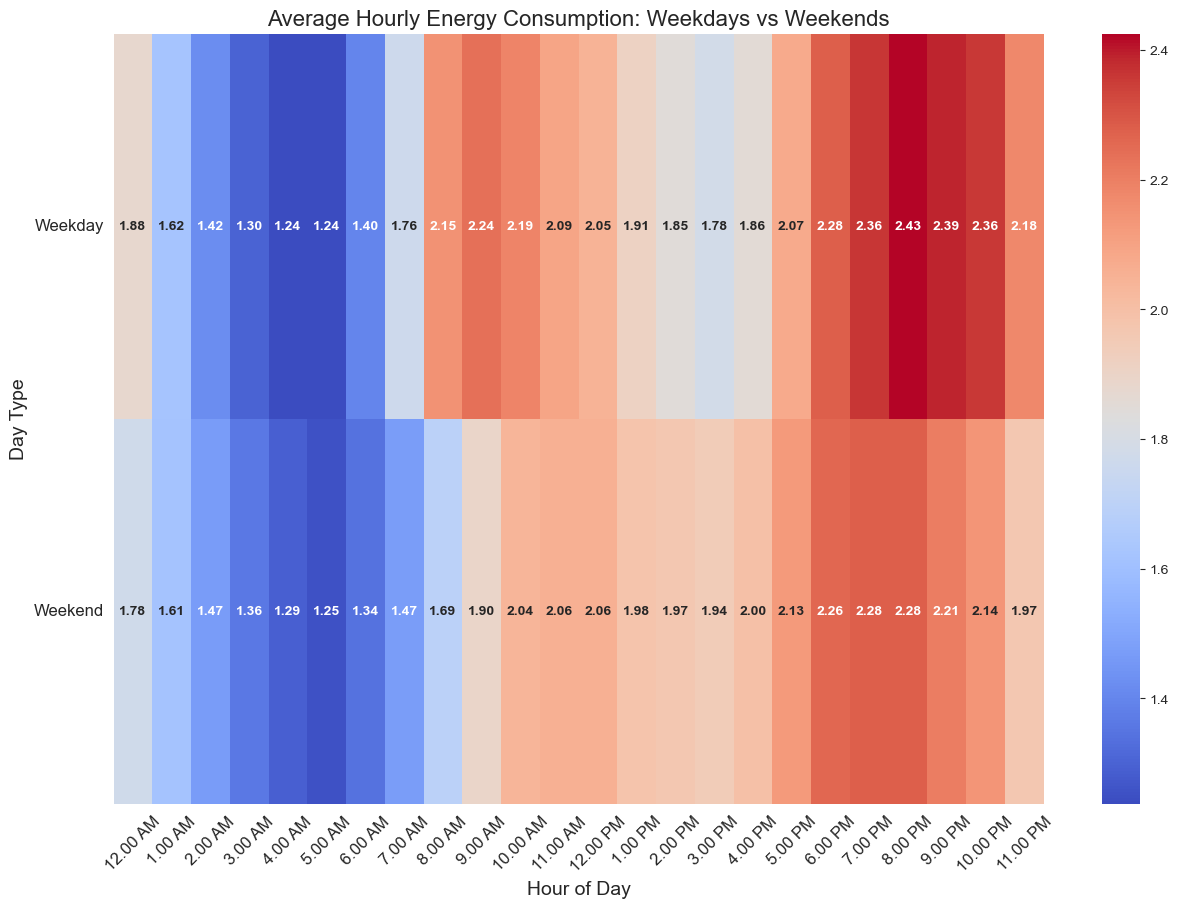

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)


# Ensure the 'Date' column is in the correct format and convert it to datetime
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')  # Adjust the format as per your CSV

# Determine if the date is a weekday or a weekend
energy_data['DayType'] = energy_data['Date'].dt.dayofweek.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Automatically extract hourly consumption column names
# Adjust this pattern to match the column names in your CSV file
hourly_consumption_columns = [col for col in energy_data.columns if col.endswith('AM') or col.endswith('PM')]


# Calculate the average energy consumption for each hour across weekdays and weekends
avg_weekday_consumption = energy_data[energy_data['DayType'] == 'Weekday'][hourly_consumption_columns].mean()
avg_weekend_consumption = energy_data[energy_data['DayType'] == 'Weekend'][hourly_consumption_columns].mean()

# Create a DataFrame from the average consumptions
avg_consumption_df = pd.DataFrame({'Weekday': avg_weekday_consumption, 'Weekend': avg_weekend_consumption}).T

# Plotting the heatmap for visualization
plt.figure(figsize=(15, 10))
sns.heatmap(avg_consumption_df, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={'size': 10, 'weight': 'bold'})
plt.title("Average Hourly Energy Consumption: Weekdays vs Weekends", fontsize=16)
plt.ylabel("Day Type", fontsize=14)
plt.xlabel("Hour of Day", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.show()


# Seasonal Comparison of Energy Consumption for Flat Categories

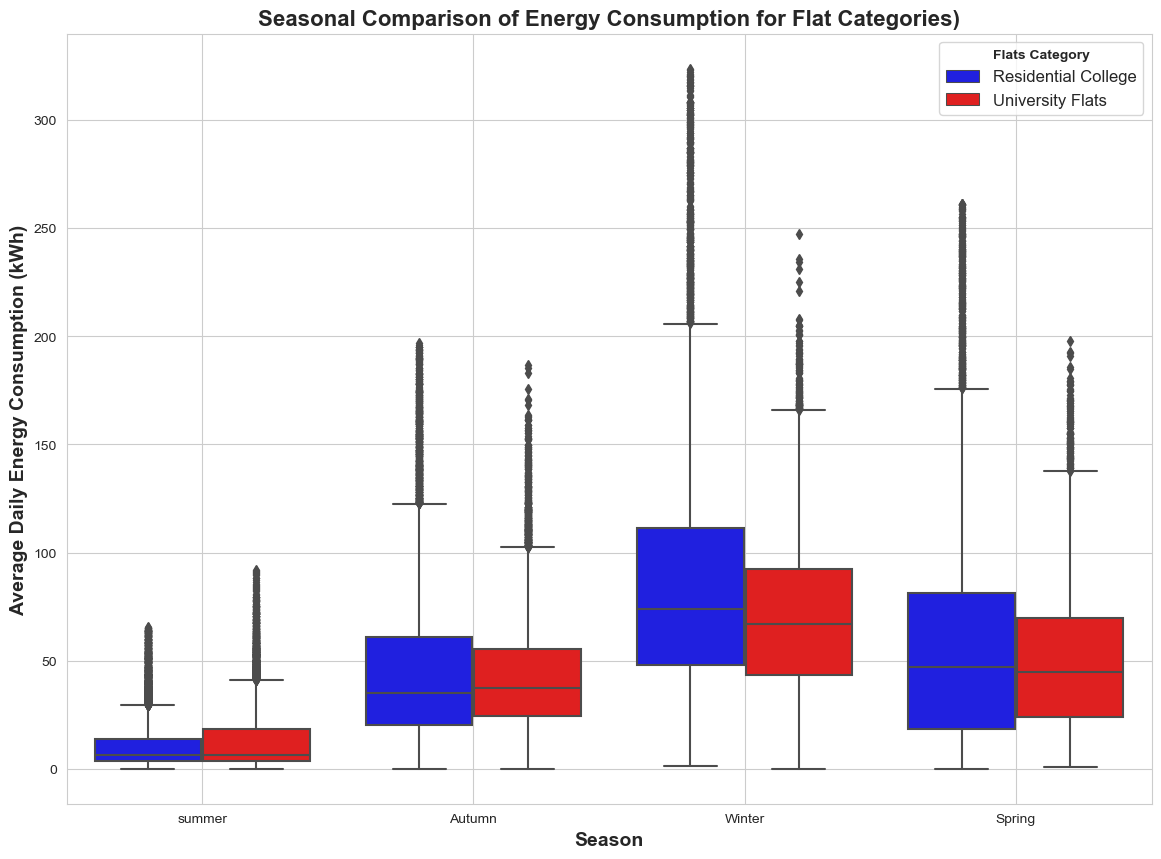

                                  mean  median        std   min     max
Flats Category      Seasons                                            
Residential College Autumn   46.387417  34.870  38.354330  0.00  196.99
                    Spring   58.153120  46.845  51.403541  0.00  261.41
                    Winter   86.548479  74.015  60.150717  1.34  323.75
                    summer   10.843072   6.530  11.285711  0.00   65.48
University Flats    Autumn   42.001928  37.270  26.320848  0.00  186.93
                    Spring   49.140027  44.920  32.630402  0.85  197.77
                    Winter   68.580222  66.855  37.540014  0.03  247.45
                    summer   12.747626   6.230  13.441516  0.00   91.78
{'University Flats - Summer': {'Outliers': array([], dtype=object), 'Count': 0}, 'University Flats - Autumn': {'Outliers': array(['0000002867DED9E', '0000003274DE059', '0000003686DECCA'],
      dtype=object), 'Count': 3}, 'University Flats - Winter': {'Outliers': array(['00000028

In [ ]:
# Seasonal Comparison of Energy Consumption for Flat Categories


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)


energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
energy_data['DayOfWeek'] = energy_data['Date'].dt.dayofweek
energy_data['DayType'] = energy_data['DayOfWeek'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Define bounds for outliers using mean and standard deviation
means = energy_data.groupby(['Flats Category', 'Seasons'])['TotaldailyenergyConsumption'].mean()
stds = energy_data.groupby(['Flats Category', 'Seasons'])['TotaldailyenergyConsumption'].std()

# Calculate the z-scores for each data point
energy_data['ZScore'] = energy_data.groupby(['Flats Category', 'Seasons'])['TotaldailyenergyConsumption'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Filter data points that are within ±3 standard deviations
filtered_data = energy_data[energy_data['ZScore'].abs() <= 3]

# Create the box plot
plt.figure(figsize=(14, 10))
sns.boxplot(x='Seasons', y='TotaldailyenergyConsumption', hue='Flats Category',
            data=filtered_data, palette={'University Flats': 'red', 'Residential College': 'blue'},
            showfliers=True, whis=1.5)

# Enhance plot aesthetics
plt.title('Seasonal Comparison of Energy Consumption for Flat Categories)', fontsize=16, weight='bold')
plt.xlabel('Season', fontsize=14, weight='bold')
plt.ylabel('Average Daily Energy Consumption (kWh)', fontsize=14, weight='bold')
plt.grid(True)
plt.legend(title='Flats Category', title_fontsize='13', fontsize='12', loc='upper right', frameon=True, fancybox=True).set_title('Flats Category', prop={'weight': 'bold'})

# Show the plot
plt.show()

# Compute basic statistics for the filtered data
grouped_data = filtered_data.groupby(['Flats Category', 'Seasons'])['TotaldailyenergyConsumption']
statistics = grouped_data.agg(['mean', 'median', 'std', 'min', 'max'])

# Display the statistics
print(statistics)

###########################################

# Modified function to get unique Smart Meter Ids of outliers along with their count for each category and season
def get_outliers_with_count(df, category, season):
    outliers = df[(df['Flats Category'] == category) &
                  (df['Seasons'] == season) &
                  (df['ZScore'].abs() > 3)]
    unique_outliers = outliers['Smart Meter Id'].unique()
    count = len(unique_outliers)
    return unique_outliers, count
# Getting outliers with count for University Flats and Residential College in each season
outliers_with_count = {}
seasons = ['Summer', 'Autumn', 'Winter', 'Spring']
categories = ['University Flats', 'Residential College']

for category in categories:
    for season in seasons:
        key = f"{category} - {season}"
        outliers, count = get_outliers_with_count(energy_data, category, season)
        outliers_with_count[key] = {'Outliers': outliers, 'Count': count}

print(outliers_with_count)


# Energy Consumption Comparison (Holidays vs. Term Time)

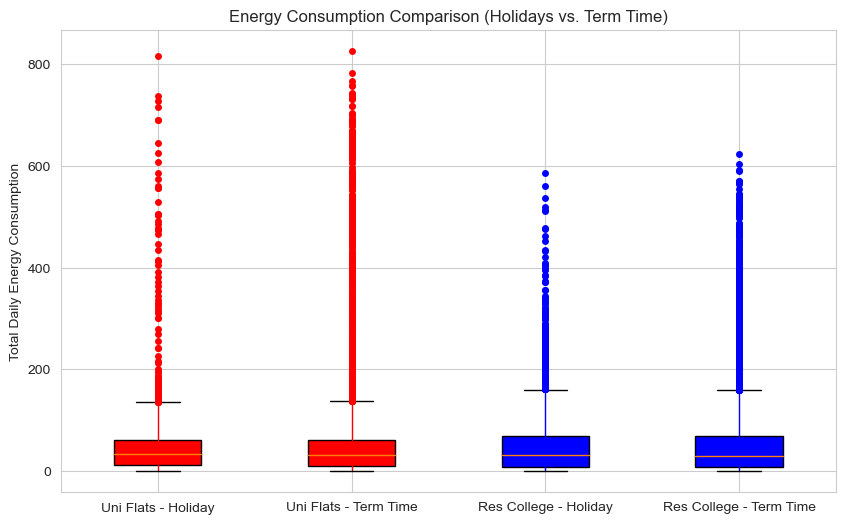

Statistics for Uni Flats - Holiday:
  Mean: 43.61689908256881
  Median: 33.45
  Standard Deviation: 51.890322709873054
  Interquartile Range (IQR): 49.727500000000006
  Lower Bound (Mean - 3*SD): -112.05406904705035
  Upper Bound (Mean + 3*SD): 199.28786721218796

Statistics for Uni Flats - Term Time:
  Mean: 42.39346005990424
  Median: 31.59
  Standard Deviation: 51.30102118004702
  Interquartile Range (IQR): 51.06
  Lower Bound (Mean - 3*SD): -111.50960348023682
  Upper Bound (Mean + 3*SD): 196.2965236000453

Statistics for Res College - Holiday:
  Mean: 50.2892751004016
  Median: 31.035
  Standard Deviation: 60.64385804093418
  Interquartile Range (IQR): 60.5175
  Lower Bound (Mean - 3*SD): -131.64229902240095
  Upper Bound (Mean + 3*SD): 232.22084922320414

Statistics for Res College - Term Time:
  Mean: 49.444607736860036
  Median: 29.49
  Standard Deviation: 60.815446431048336
  Interquartile Range (IQR): 60.550000000000004
  Lower Bound (Mean - 3*SD): -133.00173155628497
  Upper

In [ ]:
# Energy Consumption Comparison (Holidays vs. Term Time)


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)


# Filtering data for 'University Flats' and 'Residential College'
university_flats = energy_data[energy_data['Flats Category'] == 'University Flats']
residential_college = energy_data[energy_data['Flats Category'] == 'Residential College']

# Preparing data for box plot
data_to_plot = [
    university_flats[university_flats['Periods'] == 'Holiday']['TotaldailyenergyConsumption'],
    university_flats[university_flats['Periods'] == 'Term Time']['TotaldailyenergyConsumption'],
    residential_college[residential_college['Periods'] == 'Holiday']['TotaldailyenergyConsumption'],
    residential_college[residential_college['Periods'] == 'Term Time']['TotaldailyenergyConsumption']
]

# Labels for the box plot
labels = ['Uni Flats - Holiday', 'Uni Flats - Term Time', 'Res College - Holiday', 'Res College - Term Time']

# Defining colors for the box plot
box_colors = ['red', 'red', 'blue', 'blue']
outlier_colors = ['red', 'red', 'blue', 'blue']

# Creating the box plot
plt.figure(figsize=(10, 6))
bplot = plt.boxplot(data_to_plot, labels=labels, patch_artist=True, showfliers=True)

# Coloring the boxes and setting whisker and outlier properties
for i, (patch, color) in enumerate(zip(bplot['boxes'], box_colors)):
    patch.set_facecolor(color)
    plt.setp(bplot['whiskers'][2*i:2*(i+1)], color=color)
    fliers = bplot['fliers'][i]
    fliers.set_markerfacecolor(outlier_colors[i])
    fliers.set_marker('o')
    fliers.set_markersize(5)
    fliers.set_markeredgewidth(0)

plt.title('Energy Consumption Comparison (Holidays vs. Term Time)')
plt.ylabel('Total Daily Energy Consumption')
plt.grid(True)
plt.show()

# Calculate and print statistical values for each data subset
for i, data in enumerate(data_to_plot):
    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)
    IQR = np.percentile(data, 75) - np.percentile(data, 25)
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev

    print(f"Statistics for {labels[i]}:")
    print(f"  Mean: {mean}")
    print(f"  Median: {median}")
    print(f"  Standard Deviation: {std_dev}")
    print(f"  Interquartile Range (IQR): {IQR}")
    print(f"  Lower Bound (Mean - 3*SD): {lower_bound}")
    print(f"  Upper Bound (Mean + 3*SD): {upper_bound}\n")

# Identifying and printing unique smart meters for outliers
data_categories = [
    university_flats[university_flats['Periods'] == 'Holiday'],
    university_flats[university_flats['Periods'] == 'Term Time'],
    residential_college[residential_college['Periods'] == 'Holiday'],
    residential_college[residential_college['Periods'] == 'Term Time']
]

for i, category_data in enumerate(data_categories):
    mean = np.mean(category_data['TotaldailyenergyConsumption'])
    std_dev = np.std(category_data['TotaldailyenergyConsumption'])
    outliers = category_data[(category_data['TotaldailyenergyConsumption'] < mean - 3 * std_dev) |
                             (category_data['TotaldailyenergyConsumption'] > mean + 3 * std_dev)]
    unique_meters = outliers['Smart Meter Id'].unique()
    print(f"Unique smart meters for outliers in {labels[i]}: {unique_meters}")


# Day vs Night Energy Consumption in University Flats and Residential Colleges

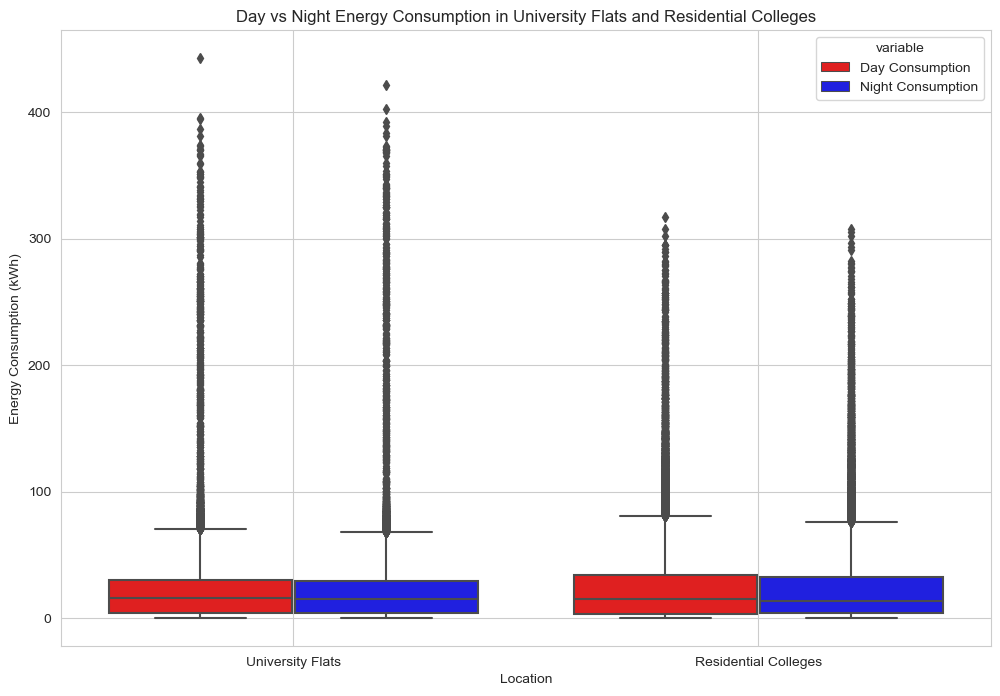

Outliers in University Flats:
        Smart Meter Id             Street
17960  0000002867DED9E  Cumberland Street
32475  0000003274DE059  Cumberland Street
40999  0000003686DECCA      Dundas street
73833  0000201467DEBAA  Great King Street

Outliers in Residential Colleges:
        Smart Meter Id              Street
1486   0000002355DE9ED          Heriot Row
2769   0000002393DEF8D        Queen street
3666   0000002395DEE02        Queen street
4180   0000002399DED1C          Heriot Row
4630   0000002413DE5C5         Park Street
12270  0000002491DE00A        Queen street
24407  0000002899DEE12       Dundas street
36065  0000003502DEB89       Dundas street
42850  0000003828DE145       Dundas street
44142  0000003832DE979        Clyde street
45489  0000003838DEBE8        Clyde street
46826  0000003898DE3F7  Saint David Street
64792  0000100188DE6DF   Cumberland Street
69204  0000200385DEF37        Clyde street
79126  0000201778DEDDA        Queen street


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Filter data for University Flats and Residential Colleges
university_flats = energy_data[energy_data['Flats Category'] == 'University Flats'].copy()
residential_colleges = energy_data[energy_data['Flats Category'] == 'Residential College'].copy()

# Define day and night hours (corrected night hours)
day_hours = [
    '6.00 AM', '7.00 AM', '8.00 AM', '9.00 AM', '10.00 AM', '11.00 AM',
    '12.00 PM', '1.00 PM', '2.00 PM', '3.00 PM', '4.00 PM', '5.00 PM'
]

night_hours = [
    '6.00 PM', '7.00 PM', '8.00 PM', '9.00 PM', '10.00 PM', '11.00 PM',
    '12.00 AM', '1.00 AM', '2.00 AM', '3.00 AM', '4.00 AM', '5.00 AM'
]


# Calculate day and night consumption
university_flats['Day Consumption'] = university_flats[day_hours].sum(axis=1)
university_flats['Night Consumption'] = university_flats[night_hours].sum(axis=1)
residential_colleges['Day Consumption'] = residential_colleges[day_hours].sum(axis=1)
residential_colleges['Night Consumption'] = residential_colleges[night_hours].sum(axis=1)

# Combining data for box plot
combined_data = pd.concat([
    university_flats[['Day Consumption', 'Night Consumption']].assign(Location='University Flats'),
    residential_colleges[['Day Consumption', 'Night Consumption']].assign(Location='Residential Colleges')
])

# Plotting box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='value', hue='variable', data=pd.melt(combined_data, ['Location']), palette=['red', 'blue'])
plt.title('Day vs Night Energy Consumption in University Flats and Residential Colleges')
plt.xlabel('Location')
plt.ylabel('Energy Consumption (kWh)')
plt.grid(True)
plt.show()

# Identify outliers using ±3SD
def identify_outliers(df, numeric_cols):
    std_dev = df[numeric_cols].std()
    mean = df[numeric_cols].mean()
    return df[
        ((df['Day Consumption'] > mean['Day Consumption'] + 3*std_dev['Day Consumption']) |
        (df['Day Consumption'] < mean['Day Consumption'] - 3*std_dev['Day Consumption']) |
        (df['Night Consumption'] > mean['Night Consumption'] + 3*std_dev['Night Consumption']) |
        (df['Night Consumption'] < mean['Night Consumption'] - 3*std_dev['Night Consumption']))
    ]

numeric_cols = ['Day Consumption', 'Night Consumption']
outliers_flats = identify_outliers(university_flats, numeric_cols)
outliers_colleges = identify_outliers(residential_colleges, numeric_cols)

# Print the unique Smart Meter IDs and street names for the outliers
print("Outliers in University Flats:")
print(outliers_flats[['Smart Meter Id', 'Street']].drop_duplicates())

print("\nOutliers in Residential Colleges:")
print(outliers_colleges[['Smart Meter Id', 'Street']].drop_duplicates())


# Top 5 Peak Hours

In [ ]:
#Based on an energy dataset, the code examines and outputs the top 5 peak consumption hours for residential colleges and university apartments.

Peak Consumption Hours for University Flats:
 8.00 PM     2.250759
9.00 PM     2.231552
7.00 PM     2.229406
6.00 PM     2.207979
10.00 PM    2.121295
dtype: float64

Peak Consumption Hours for Residential Colleges:
 8.00 PM     2.557295
10.00 PM    2.520711
7.00 PM     2.480915
9.00 PM     2.473864
9.00 AM     2.423817
dtype: float64


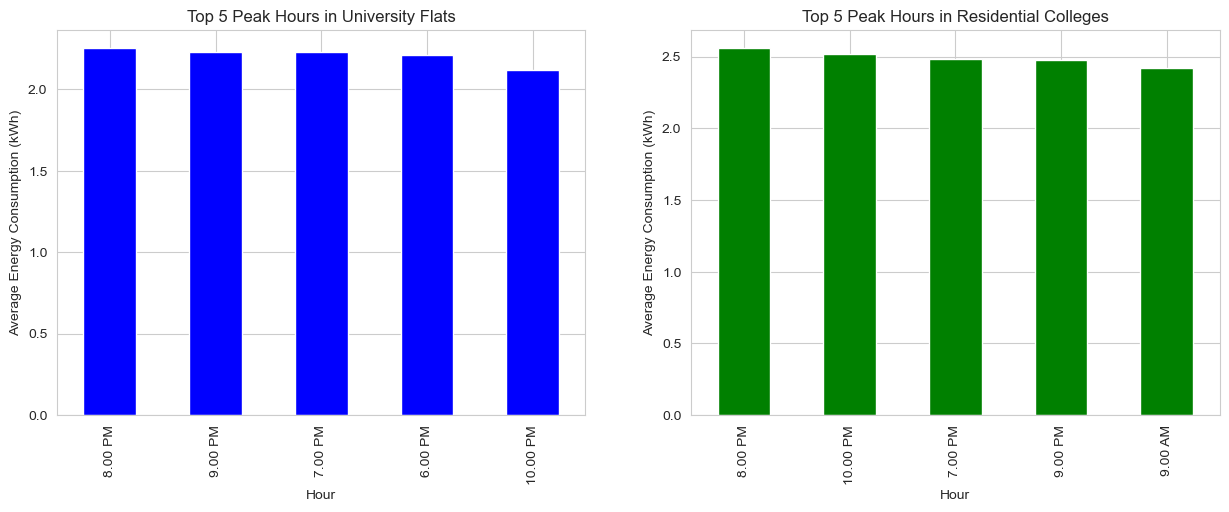

In [ ]:
# Top 5 Peak Hours

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)


# Separate the dataset for University Flats and Residential Colleges
university_flats = energy_data[energy_data['Flats Category'] == 'University Flats']
residential_colleges = energy_data[energy_data['Flats Category'] == 'Residential College']

# Corrected hourly columns (removed the extra space in '04.00-05.00')
hourly_columns = [
    '12.00 AM', '1.00 AM', '2.00 AM', '3.00 AM', '4.00 AM', '5.00 AM',
    '6.00 AM', '7.00 AM', '8.00 AM', '9.00 AM', '10.00 AM', '11.00 AM',
    '12.00 PM', '1.00 PM', '2.00 PM', '3.00 PM', '4.00 PM', '5.00 PM',
    '6.00 PM', '7.00 PM', '8.00 PM', '9.00 PM', '10.00 PM', '11.00 PM'
]

# Aggregate and identify peak consumption times for University Flats
peak_hours_flats = university_flats[hourly_columns].mean().sort_values(ascending=False)
print("Peak Consumption Hours for University Flats:\n", peak_hours_flats.head(5))

# Aggregate and identify peak consumption times for Residential Colleges
peak_hours_colleges = residential_colleges[hourly_columns].mean().sort_values(ascending=False)
print("\nPeak Consumption Hours for Residential Colleges:\n", peak_hours_colleges.head(5))

# Optional: Plotting the results for visual comparison
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
peak_hours_flats.head(5).plot(kind='bar', color='blue', title='Top 5 Peak Hours in University Flats')
plt.xlabel('Hour')
plt.ylabel('Average Energy Consumption (kWh)')

plt.subplot(1, 2, 2)
peak_hours_colleges.head(5).plot(kind='bar', color='green', title='Top 5 Peak Hours in Residential Colleges')
plt.xlabel('Hour')
plt.ylabel('Average Energy Consumption (kWh)')
plt.show()

